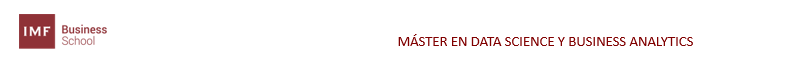

####  **Proyecto Final del Master   TFM**  
#### **MÁSTER EN DATA SCIENCE Y BUSINESS ANALYTICS**

**Estudiante :  Richard Douglas Grijalba**

Lograr un aporte a la salud por medio de los ML debe ser un nuevo hito en la historia de la humanidad. Ahora no solo podemos diagnosticarnos, sino también adelantarnos a algunos sucesos de salud que pueden acontecer en un futuro cercano o a mediano plazo.

Como dijo Neil Armstrong: “Este es un pequeño paso para un hombre, un gran salto para la humanidad.”

En mi experiencia personal, desarrollar este proyecto final me ha dado la oportunidad de valorar muchos aspectos, como el tiempo de calidad en familia, y entender que cada minuto cuenta y vale. Para ello, necesitamos estar en buenas condiciones. La salud no es solo lo que comemos, sino también lo que pensamos y decimos.

Que la salud de todos esté en las manos de Dios y en la sabiduría y conocimiento de los médicos


**Programa en modalidad virtual**

#### **Dataset**   **heart-disease-data**

* Este dataset corresponde a un estudio realizado sobre pacientes y las diferentes caracteristicas que pueden determinar en la prediccion o no de un posible daño cardiaco.

* El dataset se utiliza principalmente para la clasificación y predicción de la presencia o ausencia de enfermedades cardíacas en pacientes. Los datos se basan en características clínicas y de salud de los pacientes.

se encuentra en las siguientes fuentes:
* https://www.kaggle.com/datasets/redwankarimsony/heart-disease-data
* https://archive.ics.uci.edu/dataset/45/heart+disease


**Información General de los Datos**

* id: Identificador único.
* age: Edad del paciente.
* sex: Sexo (Male/Female).
* dataset: Fuente o ubicación del dataset (por ejemplo, "Cleveland").
* cp: Tipo de dolor en el pecho (como "typical angina", "asymptomatic", etc.).
* trestbps: Presión arterial en reposo (en mm Hg).
* chol: Nivel de colesterol en sangre (mg/dL).
* fbs: Glucosa en ayunas (TRUE si es mayor a 120 mg/dL, FALSE si es menor).
* restecg: Resultados del electrocardiograma en reposo (por ejemplo, "lv hypertrophy").
* thalch: Frecuencia cardíaca máxima alcanzada.
* exang: Angina inducida por ejercicio (TRUE o FALSE).
* oldpeak: Depresión del ST inducida por ejercicio en relación al reposo.
* slope: Pendiente del segmento ST (upsloping, flat, downsloping).
* ca: Número de vasos principales coloreados por fluoroscopia.
* thal: Tipo de defecto talámico (por ejemplo, "fixed defect", "normal", etc.).
* num: Etiqueta que indica la presencia de enfermedad cardíaca (0 para ninguna, * otros valores indican presencia de enfermedad en mayor severidad).

**Caracteristica adicional : target**  se agregan las caracteristicas
0 = Representa la cantidad de casos para la clase 0 y 1= la suma de las clases 1, 2, 3, y 4.

### CARGA DE LAS BIBLIOTECAS


In [ ]:
# Se procede con la importacion de algunas librerias
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
import seaborn as sns
import plotly.express as px
import warnings
warnings.filterwarnings("ignore")

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
import sklearn.metrics as metrics
from IPython.core.display import display, HTML
from sklearn.metrics import accuracy_score

In [ ]:
def explorarVariableContinua(pDatos,pAtributo,l=30,b=8):
    plt.figure(figsize=(l,b))
    plt.subplot(131)
    sns.displot(pDatos[pAtributo])
    plt.xlabel(pAtributo)
    plt.title("Distribucion de Variables: "+pAtributo)
    plt.subplot(132)
    sns.set_style('whitegrid')
    ax= sns.boxplot(y=pAtributo,data=pDatos)
    ax=sns.stripplot(y=pAtributo,data=pDatos)
    plt.title("Distribucion de Variable: "+pAtributo)
    plt.show()

def explorarVariableCategorica(pDatos, pAtributo, l=30, b=8):
    plt.figure(figsize= (l,b))
    plt.subplot(131)
    sns.countplot(pDatos[pAtributo], order = pDatos[pAtributo].value_counts().index)
    plt.title("distribucion de Variable: "+pAtributo)
    plt.subplot(132)
    pDatos[pAtributo].value_counts().plot(kind='pie', autopct= "%0.1f %%")
    plt.title("Grafico de Pastel: "+pAtributo)
    plt.show()

def crearBoxplot(pDatos,pCategoria,pAtributo, l=20, b=8):
    plt.figure(figsize = (l,b))
    sns.set_style('whitegrid')
    ax= sns.boxplot(x=pCategoria, y=pAtributo, data=pDatos)
    ax= sns.stripplot(x=pCategoria, y=pAtributo, data=pDatos)
    plt.title("Distribucion de Variables: "+pAtributo)
    plt.show()


def getValoresDistintos(pDatos, pAtriuto):
    return(pDatos[pAtributo].value_counts())

    # lineas de codigo que permiten utilizar estas funciones para ser utilizadas mas adelante

In [ ]:
def represento_doble_hist(x_1, x_0, n_bins=11, title='', label_1='Clase 1',
                          label_0='Clase 0', density=0):
    '''
    Función que recibe dos distribuciones de probabilidad y las representa
    en el mismo gráfico
    '''
    bins = n_bins
    plt.hist(x_1, bins, density = density, alpha=0.5, label=label_1, color='red')
    plt.hist(x_0, bins, density = density, alpha=0.5, label=label_0, color='green')
    plt.title(title)
    plt.legend(loc='best')

def hist_pos_neg_feat(x, y, density=0, nbins=11, targets=(0,1)):
    '''
    Representa las variables en x divididas en dos distribuciones
    según su valor de y sea 1 o 0
    '''
    fig_tot = len(x.columns)
    fig_tot_fila = 4; fig_tamanio = 4
    num_filas = int( np.ceil(fig_tot/fig_tot_fila) )
    plt.figure( figsize=( fig_tot_fila*fig_tamanio+2, num_filas*fig_tamanio+2 ) )
    target_neg, target_pos = targets
    for i, feat in enumerate(x.columns):
        plt.subplot(num_filas, fig_tot_fila, i+1);
        plt.title('%s' % feat)
        idx_pos = y == target_pos
        idx_neg= y == target_neg
        represento_doble_hist(x[feat][idx_pos].values, x[feat][idx_neg].values, nbins,
                   density = density, title=('%s' % feat))

#### IMPORTACION DEL DATASET


In [ ]:
data = pd.read_csv('/content/heart_disease_uci.csv', delimiter= ',')


#### **Análisis Exploratorio de Datos EDA**

**Exploración Inicial de los Datos**

In [ ]:
# con esto se conoce un brve detalle de los datos a ser tratados
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        920 non-null    int64  
 1   age       920 non-null    int64  
 2   sex       920 non-null    object 
 3   dataset   920 non-null    object 
 4   cp        920 non-null    object 
 5   trestbps  861 non-null    float64
 6   chol      890 non-null    float64
 7   fbs       830 non-null    object 
 8   restecg   918 non-null    object 
 9   thalch    865 non-null    float64
 10  exang     865 non-null    object 
 11  oldpeak   858 non-null    float64
 12  slope     611 non-null    object 
 13  ca        309 non-null    float64
 14  thal      434 non-null    object 
 15  num       920 non-null    int64  
dtypes: float64(5), int64(3), object(8)
memory usage: 115.1+ KB


#### Análisis Exploratorio de datos de las variables numéricas y categóricas

**Segun lo sresultados tenemos un dataset inicial heart-disease-data**  con un total de 920  y 16 caracteristicas (columnas)

In [ ]:
print("Numero de filas: "+ str(data.shape[0]))
print("Numero de Columnas: "+ str(data.shape[1]))

Numero de filas: 920
Numero de Columnas: 16


In [ ]:
# se exploran las primeras 5 filas del dataset y se observa que datos tienen las columnas
#Exploracion inicial del dataser y sus caracteristicas
data.head(5)

id  age     sex    dataset               cp  trestbps   chol    fbs  \
0   1   63    Male  Cleveland   typical angina     145.0  233.0   True   
1   2   67    Male  Cleveland     asymptomatic     160.0  286.0  False   
2   3   67    Male  Cleveland     asymptomatic     120.0  229.0  False   
3   4   37    Male  Cleveland      non-anginal     130.0  250.0  False   
4   5   41  Female  Cleveland  atypical angina     130.0  204.0  False   

          restecg  thalch  exang  oldpeak        slope   ca  \
0  lv hypertrophy   150.0  False      2.3  downsloping  0.0   
1  lv hypertrophy   108.0   True      1.5         flat  3.0   
2  lv hypertrophy   129.0   True      2.6         flat  2.0   
3          normal   187.0  False      3.5  downsloping  0.0   
4  lv hypertrophy   172.0  False      1.4    upsloping  0.0   

                thal  num  
0       fixed defect    0  
1             normal    2  
2  reversable defect    1  
3             normal    0  
4             normal    0

In [ ]:
# Verificar los nombres de las columnas
data.columns

Index(['id', 'age', 'sex', 'dataset', 'cp', 'trestbps', 'chol', 'fbs',
       'restecg', 'thalch', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'num'],
      dtype='object')

In [ ]:
# Ver los tipos de datos de cada columna
data.dtypes

id            int64
age           int64
sex          object
dataset      object
cp           object
trestbps    float64
chol        float64
fbs          object
restecg      object
thalch      float64
exang        object
oldpeak     float64
slope        object
ca          float64
thal         object
num           int64
dtype: object

In [ ]:
# Descripción estadística del DataFrame
data.describe()

id         age    trestbps        chol      thalch     oldpeak  \
count  920.000000  920.000000  861.000000  890.000000  865.000000  858.000000   
mean   460.500000   53.510870  132.132404  199.130337  137.545665    0.878788   
std    265.725422    9.424685   19.066070  110.780810   25.926276    1.091226   
min      1.000000   28.000000    0.000000    0.000000   60.000000   -2.600000   
25%    230.750000   47.000000  120.000000  175.000000  120.000000    0.000000   
50%    460.500000   54.000000  130.000000  223.000000  140.000000    0.500000   
75%    690.250000   60.000000  140.000000  268.000000  157.000000    1.500000   
max    920.000000   77.000000  200.000000  603.000000  202.000000    6.200000   

               ca         num  
count  309.000000  920.000000  
mean     0.676375    0.995652  
std      0.935653    1.142693  
min      0.000000    0.000000  
25%      0.000000    0.000000  
50%      0.000000    1.000000  
75%      1.000000    2.000000  
max      3.000000    4.000000

In [ ]:
# Ver la cantidad de valores faltantes por columna
data.isnull().sum()

id            0
age           0
sex           0
dataset       0
cp            0
trestbps     59
chol         30
fbs          90
restecg       2
thalch       55
exang        55
oldpeak      62
slope       309
ca          611
thal        486
num           0
dtype: int64

### Imputacion de Valores ulos

**Tratamiento de Valores Nulos o Faltantes**

In [ ]:
#realizar una copia del dataset original antes de iniciar las transformaciones
df = data.copy()

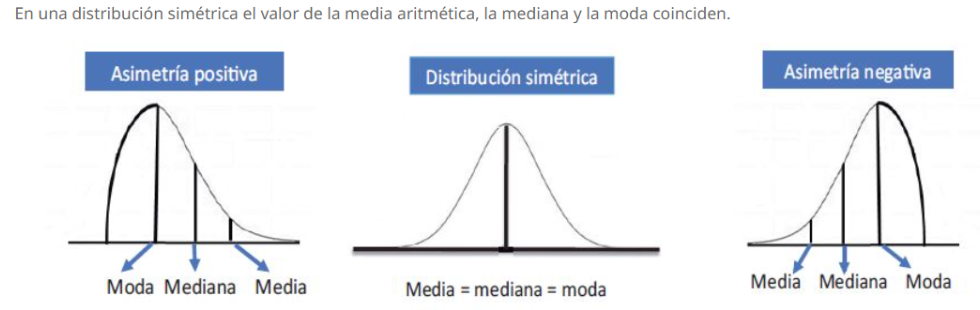

* En el caso de una distribucion con un comportamiento Simetrico se toma el valor de la Media
* En el caso de una distribucion con comportamiento Asimetrico se toma el valor de la Mediana
* En el caso de alguna caracteristica de tipo categorica se utiliza la Moda


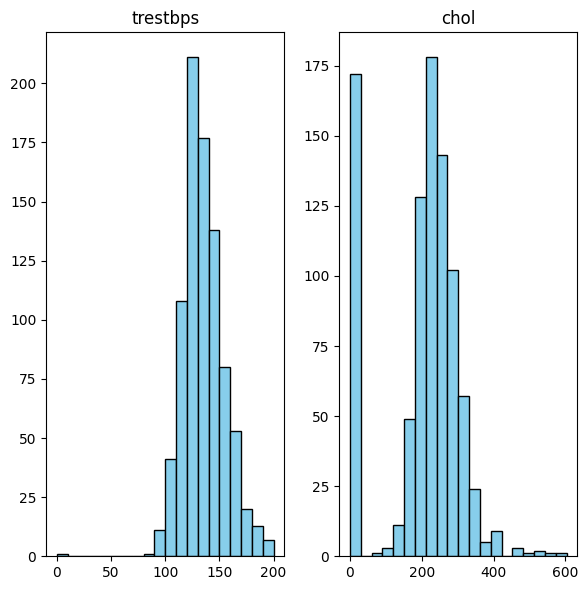

In [ ]:
# Crear una figura y ejes para los 10 histogramas
fig, axs = plt.subplots(1, 2, figsize=(6, 6))

# Nombres de las columnas
columnas = ['trestbps', 'chol']

# Iterar sobre cada columna y crear un histograma en el eje correspondiente
for i, columna in enumerate(columnas):
    axs[i].hist(df[columna], bins=20, color='skyblue', edgecolor='black')
    axs[i].set_title(columna)

# Ajustar el diseño de los subgráficos
plt.tight_layout()
plt.show()

In [ ]:
# Calcular media, mediana y moda de las columnas 'trestbps' y 'chol'
columnas = ['trestbps', 'chol']

# Media
media = df[columnas].mean()

# Mediana
mediana = df[columnas].median()

# Moda
moda = df[columnas].mode().iloc[0]  # Tomamos el primer valor de la moda, ya que puede haber más de uno

# Mostrar los resultados
print(f"Media:\n{media}\n")
print(f"Mediana:\n{mediana}\n")
print(f"Moda:\n{moda}\n")

Media:
trestbps    132.132404
chol        199.130337
dtype: float64

Mediana:
trestbps    130.0
chol        223.0
dtype: float64

Moda:
trestbps    120.0
chol          0.0
Name: 0, dtype: float64



*Encontrar las modas y medianas de las caracteristicas*


In [ ]:
# Calcular la moda para características de tipo objeto
moda_objetos = df.select_dtypes(include=['object']).mode().iloc[0]

# Calcular la mediana para características de tipo float
mediana_numericas = df.select_dtypes(include=['float64']).median()

# Calcular la suma de valores nulos
valores_nulos = df.isnull().sum()

# Mostrar los resultados
print("Moda de las características tipo objeto:")
print(moda_objetos)
print("\nMediana de las características tipo float:")
print(mediana_numericas)
print("\nSuma de valores nulos por columna:")
print(valores_nulos)

Moda de las características tipo objeto:
sex                Male
dataset       Cleveland
cp         asymptomatic
fbs               False
restecg          normal
exang             False
slope              flat
thal             normal
Name: 0, dtype: object

Mediana de las características tipo float:
trestbps    130.0
chol        223.0
thalch      140.0
oldpeak       0.5
ca            0.0
dtype: float64

Suma de valores nulos por columna:
id            0
age           0
sex           0
dataset       0
cp            0
trestbps     59
chol         30
fbs          90
restecg       2
thalch       55
exang        55
oldpeak      62
slope       309
ca          611
thal        486
num           0
dtype: int64


Se va  a tratar los campos con valores nulos o faltantes segun lo indicado

* numericos por la **mediana**
* caracteristicas objeto por la **moda**

df['nombre_columna'] = df['nombre_columna'].fillna(valor)


In [ ]:
# Rellenar valores nulos para características numéricas (tipo float) con la mediana
for columna in df.select_dtypes(include=['float64']).columns:
    mediana = df[columna].median()
    df[columna] = df[columna].fillna(mediana)

# Rellenar valores nulos para características de tipo objeto con la moda
for columna in df.select_dtypes(include=['object']).columns:
    moda = df[columna].mode().iloc[0]
    df[columna] = df[columna].fillna(moda)

# Mostrar DataFrame modificado
print(df)

      id  age     sex        dataset               cp  trestbps   chol    fbs  \
0      1   63    Male      Cleveland   typical angina     145.0  233.0   True   
1      2   67    Male      Cleveland     asymptomatic     160.0  286.0  False   
2      3   67    Male      Cleveland     asymptomatic     120.0  229.0  False   
3      4   37    Male      Cleveland      non-anginal     130.0  250.0  False   
4      5   41  Female      Cleveland  atypical angina     130.0  204.0  False   
..   ...  ...     ...            ...              ...       ...    ...    ...   
915  916   54  Female  VA Long Beach     asymptomatic     127.0  333.0   True   
916  917   62    Male  VA Long Beach   typical angina     130.0  139.0  False   
917  918   55    Male  VA Long Beach     asymptomatic     122.0  223.0   True   
918  919   58    Male  VA Long Beach     asymptomatic     130.0  385.0   True   
919  920   62    Male  VA Long Beach  atypical angina     120.0  254.0  False   

              restecg  thal

In [ ]:
# Verificar que el dataset no los contenga
df.isnull().sum()

id          0
age         0
sex         0
dataset     0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalch      0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
num         0
dtype: int64

**Conocer descripcion del dataset**

In [ ]:
df.describe().T

count        mean         std   min     25%    50%     75%    max
id        920.0  460.500000  265.725422   1.0  230.75  460.5  690.25  920.0
age       920.0   53.510870    9.424685  28.0   47.00   54.0   60.00   77.0
trestbps  920.0  131.995652   18.451300   0.0  120.00  130.0  140.00  200.0
chol      920.0  199.908696  109.040171   0.0  177.75  223.0  267.00  603.0
thalch    920.0  137.692391   25.145235  60.0  120.00  140.0  156.00  202.0
oldpeak   920.0    0.853261    1.058049  -2.6    0.00    0.5    1.50    6.2
ca        920.0    0.227174    0.628936   0.0    0.00    0.0    0.00    3.0
num       920.0    0.995652    1.142693   0.0    0.00    1.0    2.00    4.0

In [ ]:
df.dtypes


id            int64
age           int64
sex          object
dataset      object
cp           object
trestbps    float64
chol        float64
fbs            bool
restecg      object
thalch      float64
exang          bool
oldpeak     float64
slope        object
ca          float64
thal         object
num           int64
dtype: object

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        920 non-null    int64  
 1   age       920 non-null    int64  
 2   sex       920 non-null    object 
 3   dataset   920 non-null    object 
 4   cp        920 non-null    object 
 5   trestbps  920 non-null    float64
 6   chol      920 non-null    float64
 7   fbs       920 non-null    bool   
 8   restecg   920 non-null    object 
 9   thalch    920 non-null    float64
 10  exang     920 non-null    bool   
 11  oldpeak   920 non-null    float64
 12  slope     920 non-null    object 
 13  ca        920 non-null    float64
 14  thal      920 non-null    object 
 15  num       920 non-null    int64  
dtypes: bool(2), float64(5), int64(3), object(6)
memory usage: 102.5+ KB


### Histogramas de las caracteristicas en limpio


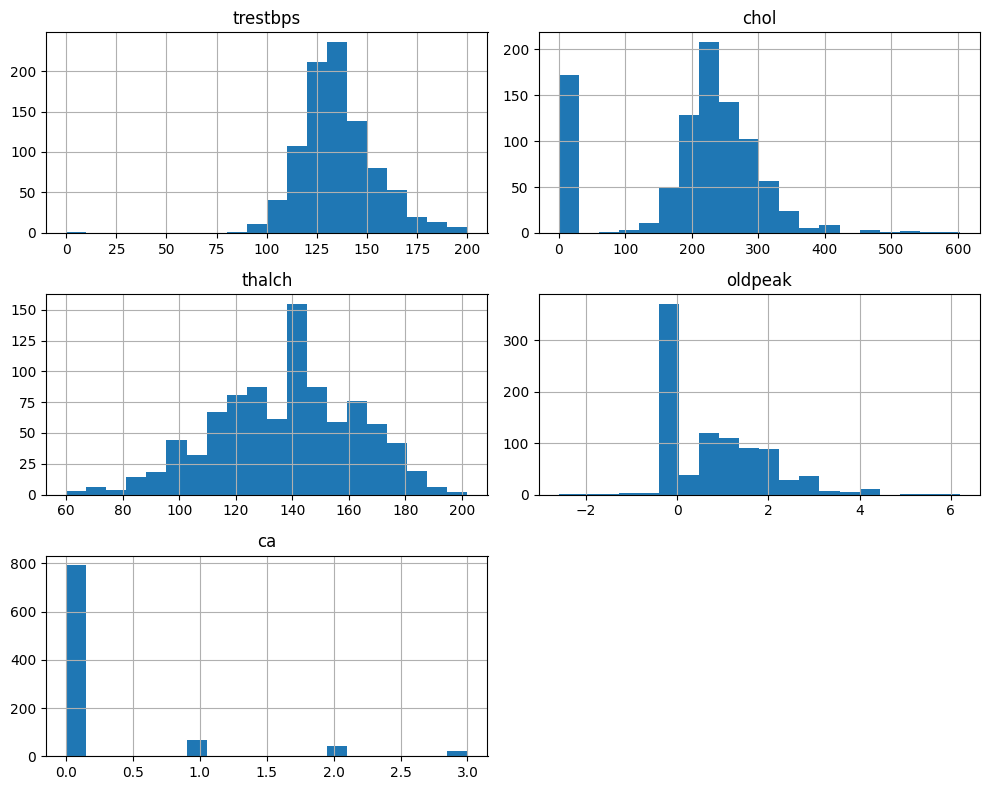

In [ ]:
# Seleccionar las columnas de tipo float
columnas_float = df.select_dtypes(include=['float64']).columns

# Crear histogramas para cada una de las columnas de tipo float
df[columnas_float].hist(bins=20, figsize=(10, 8))
plt.tight_layout()
plt.show()

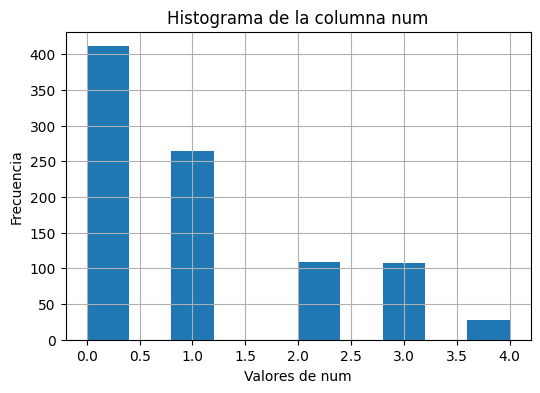

In [ ]:
df['num'].hist(bins=10, figsize=(6, 4))
plt.title('Histograma de la columna num')
plt.xlabel('Valores de num')
plt.ylabel('Frecuencia')
plt.show()

In [ ]:
df['num'].value_counts()

num
0    411
1    265
2    109
3    107
4     28
Name: count, dtype: int64

### Generar Graficos Boxplots

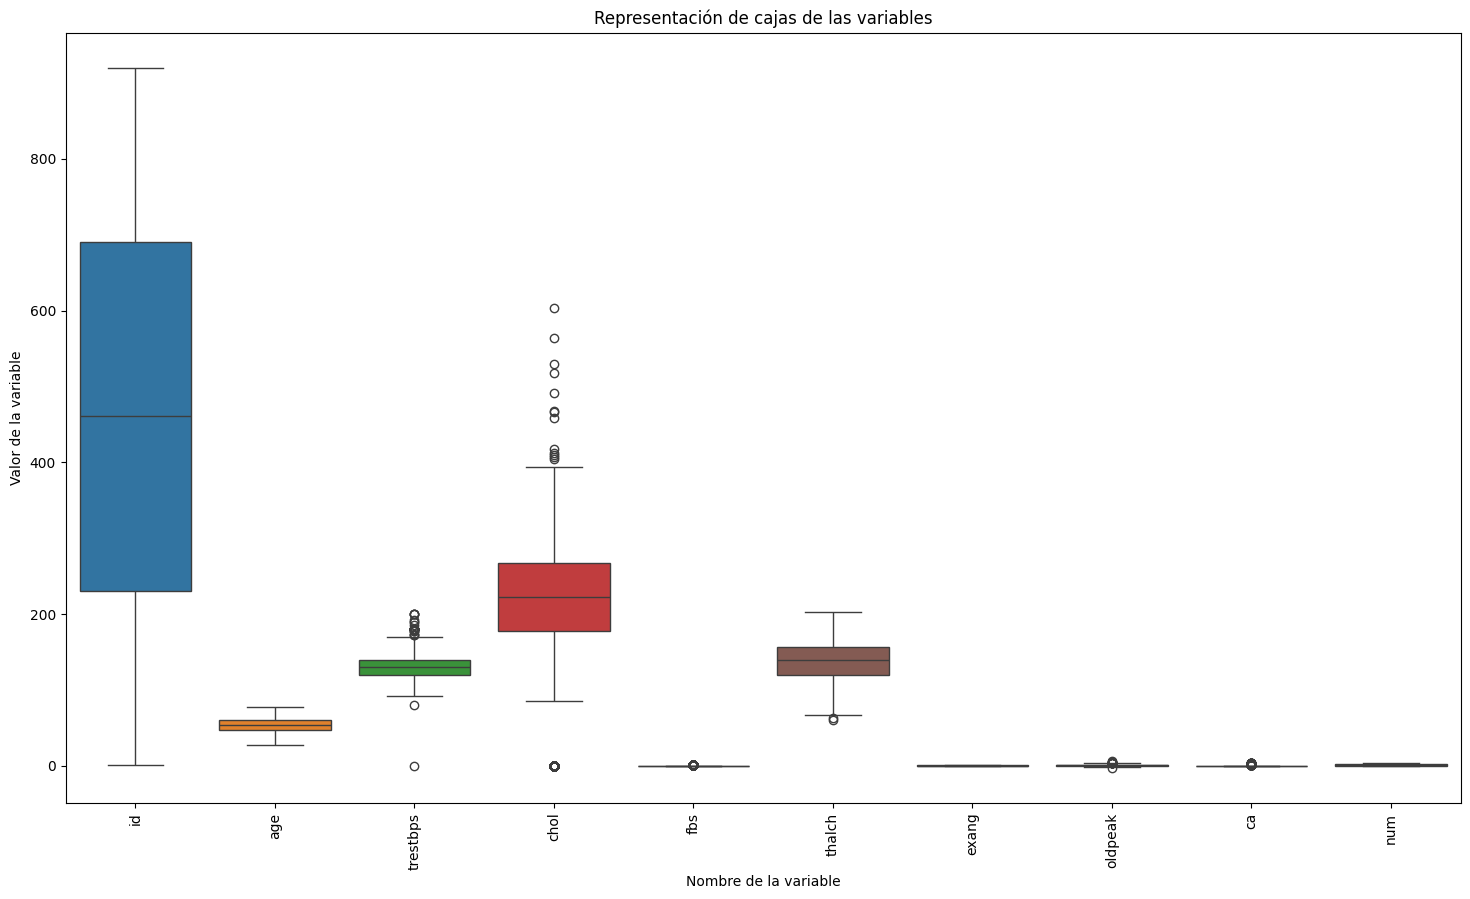

In [ ]:
#Se generan los graficos de caja/bigotes  Boxplots para ver los datos
plt.figure(figsize=(18,10))
ax = sns.boxplot(data=df)
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
plt.title(u'Representación de cajas de las variables')
plt.ylabel('Valor de la variable')
_ = plt.xlabel('Nombre de la variable')

**Informacion referente al grafico de Boxplots**

* Edad (age): Se observa una distribución relativamente concentrada alrededor de la mediana, con un rango estrecho, lo que sugiere una variación pequeña en la muestra de edades.

* Presión arterial en reposo (trestbps): La caja muestra una concentración central de datos, pero se observan outliers hacia el extremo inferior, lo que indica valores de presión arterial en reposo significativamente más bajos en algunos casos.

* Colesterol (chol): Aquí también se observan varios outliers, principalmente valores de colesterol más altos, lo que sugiere que hay pacientes con niveles de colesterol fuera de los rangos típicos, posiblemente indicando problemas de salud.

* thalach: Se encuentra bastante centrada, con algunos outliers en ambos extremos, lo que refleja variabilidad en la capacidad cardiovascular de las personas objeto de estudio.

* oldpeak: La mayoría de los valores están concentrados cerca de 0, lo que indica que muchos pacientes no presentan depresión significativa del ST, aunque se observan algunos outliers.

*Por lo tanto segun lo que se observa hay valores en cero que no tienen sentido, por lo que estos valores ser'an tratados.*

**Conocer el comportamiento de las caracteristicas y relaciones con las demás**

**Caracteristica : Sex = Female o Male

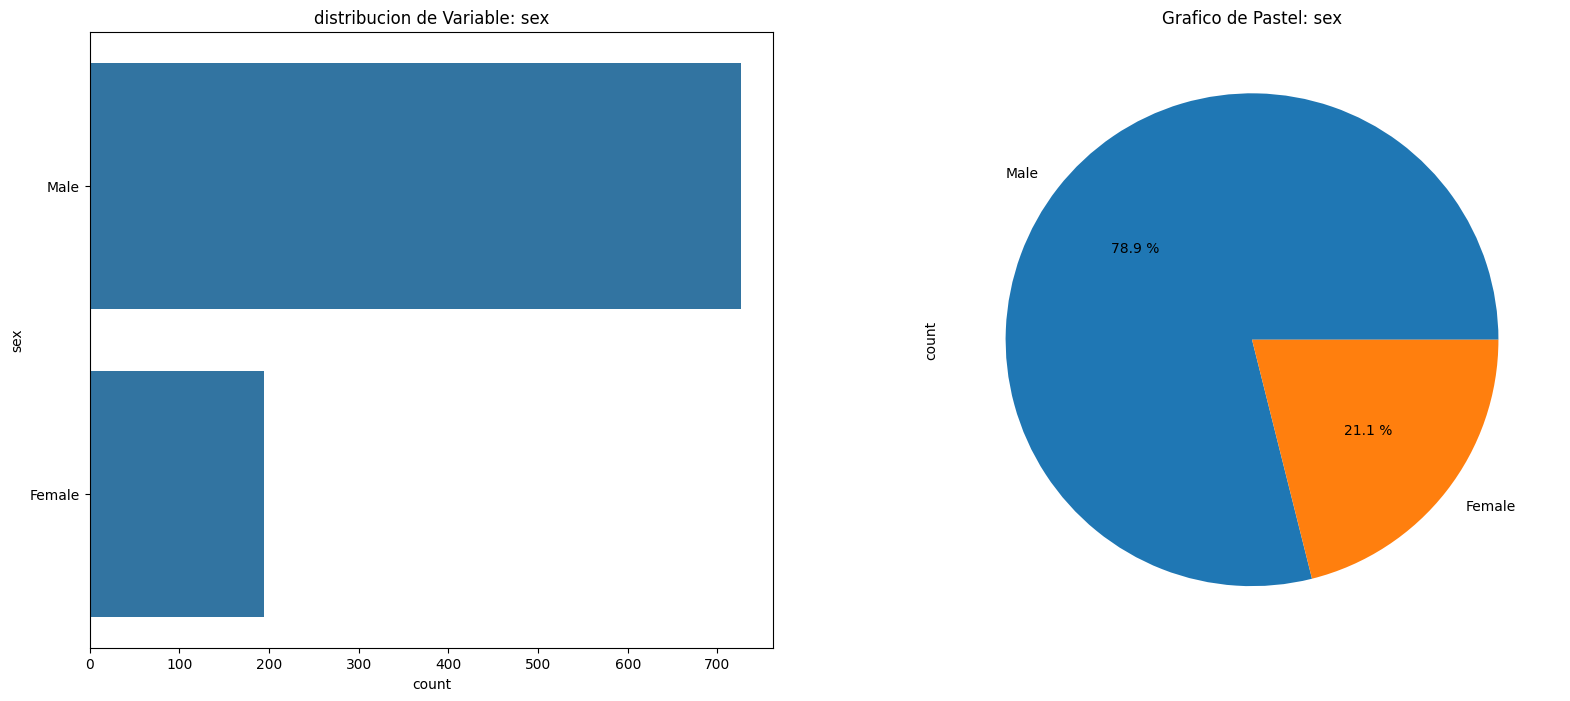

In [ ]:
explorarVariableCategorica(df,"sex")

**Información del grafico**

Se observa que hay una mayor cantidad de individuos de sexo masculino en el dataset, con más de 700 observaciones, en comparación con menos de 200 observaciones para individuos de sexo femenino.

* Los hombres representan el 78.9% de la población, mientras que las mujeres constituyen solo el 21.1%.



**Caracteristica Edad**

In [ ]:
df['age'].describe()

count    920.000000
mean      53.510870
std        9.424685
min       28.000000
25%       47.000000
50%       54.000000
75%       60.000000
max       77.000000
Name: age, dtype: float64

**Tecnica de feature engineering**

Se toma una caracteristica y se amplian los datos para mejorar las posibildiades de analisis

In [ ]:
#crear un rango de edad
df['age_range'] = (df['age']//10)*10

In [ ]:
df.head(5)

id  age     sex    dataset               cp  trestbps   chol    fbs  \
0   1   63    Male  Cleveland   typical angina     145.0  233.0   True   
1   2   67    Male  Cleveland     asymptomatic     160.0  286.0  False   
2   3   67    Male  Cleveland     asymptomatic     120.0  229.0  False   
3   4   37    Male  Cleveland      non-anginal     130.0  250.0  False   
4   5   41  Female  Cleveland  atypical angina     130.0  204.0  False   

          restecg  thalch  exang  oldpeak        slope   ca  \
0  lv hypertrophy   150.0  False      2.3  downsloping  0.0   
1  lv hypertrophy   108.0   True      1.5         flat  3.0   
2  lv hypertrophy   129.0   True      2.6         flat  2.0   
3          normal   187.0  False      3.5  downsloping  0.0   
4  lv hypertrophy   172.0  False      1.4    upsloping  0.0   

                thal  num  age_range  
0       fixed defect    0         60  
1             normal    2         60  
2  reversable defect    1         60  
3             normal    0         30  
4             normal    0         40

In [ ]:
df.groupby('age_range').size()

age_range
20      4
30     76
40    212
50    375
60    222
70     31
dtype: int64

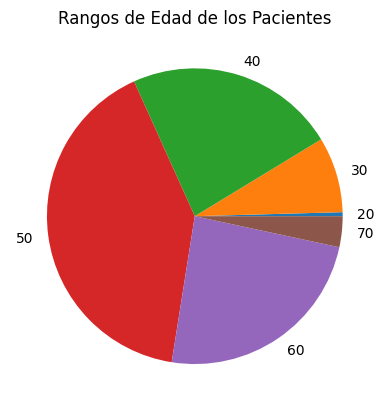

In [ ]:
df.groupby('age_range').size().plot(kind = 'pie')
sns.set(rc={'figure.figsize':(5,5)})
plt.title('Rangos de Edad de los Pacientes')
plt.show()

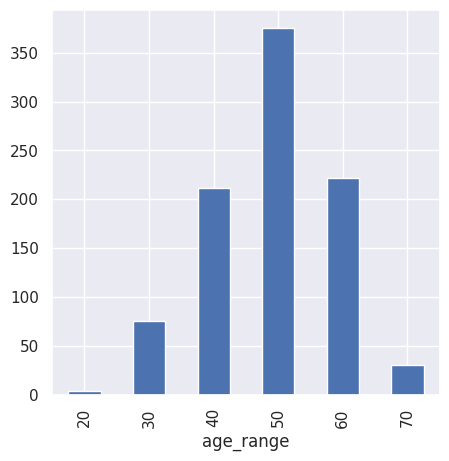

In [ ]:
df.groupby('age_range').size().plot(kind = 'bar')
sns.set(rc={'figure.figsize':(7,7)})
plt.show()

**informacion del grafico** *se puede observar que la mayor cantidad de individuos se concentra en el rango de los 50 años, seguido por los rangos de 40 y 60 años.*

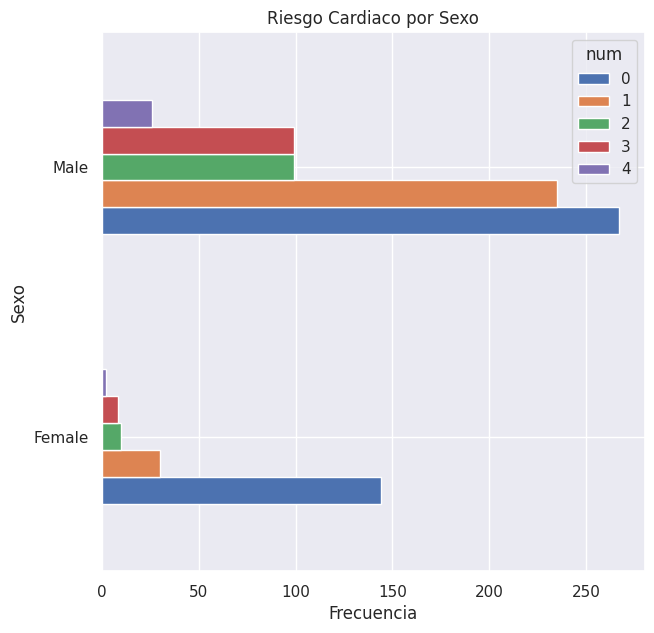

In [ ]:
graficos1 = pd.crosstab(df.sex, df.num)
graficos1.plot.barh()

# Agregar título y etiquetas
plt.title('Riesgo Cardiaco por Sexo')
plt.xlabel('Frecuencia')
plt.ylabel('Sexo')

# Mostrar el gráfico
plt.show()

**Información del gráfico**
* 0: No Heart Disease (sin enfermedad cardíaca)
* 1: Mild Heart Disease (enfermedad cardíaca leve)
* 2: Moderate Heart Disease (enfermedad cardíaca moderada)
* 3: Severe Heart Disease (enfermedad cardíaca severa)
* 4: Critical Heart Disease (enfermedad cardíaca crítica)

Según se puede ver tenemos en el dataset una mayor cantidad de hombres que mujeres, ademas indicandonos que los hombres tienen más representación en las categorías de mayor riesgo.



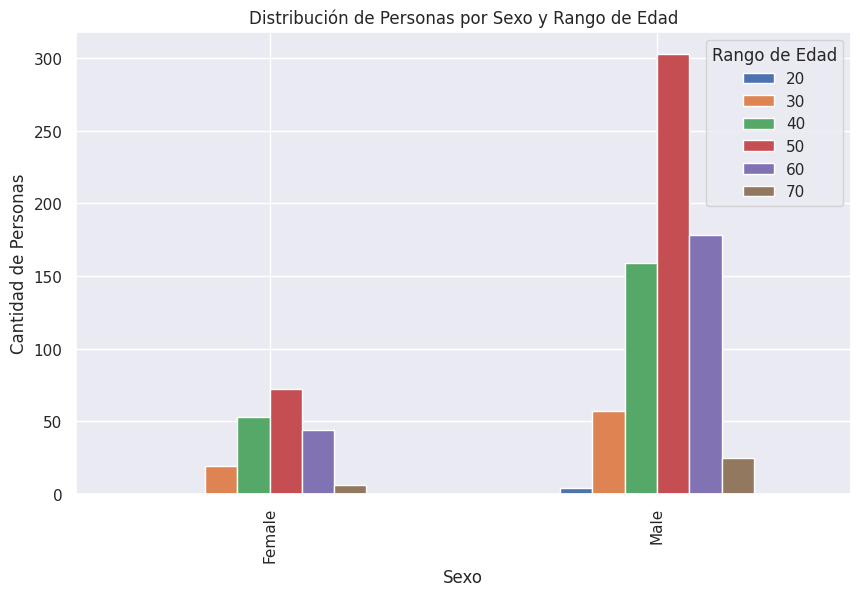

In [ ]:
graficos2 = pd.crosstab(df['sex'], df['age_range'])

# Crear el gráfico de barras agrupado
graficos2.plot(kind='bar', figsize=(10, 6))

# Agregar título y etiquetas
plt.title('Distribución de Personas por Sexo y Rango de Edad')
plt.xlabel('Sexo')
plt.ylabel('Cantidad de Personas')
plt.legend(title='Rango de Edad')
plt.show()

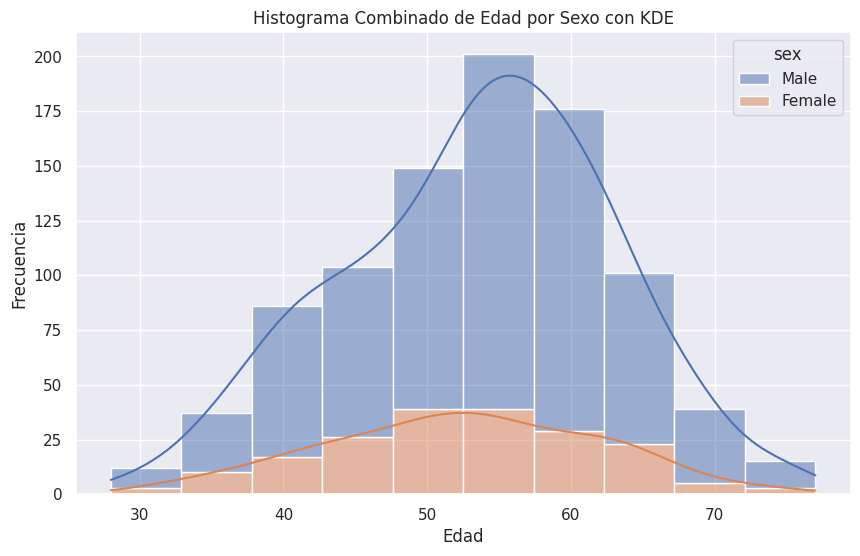

In [ ]:
# Crear un histograma combinado para la edad, diferenciado por sexo
plt.figure(figsize=(10, 6))
sns.histplot(df, x='age', hue='sex', kde=True, bins=10, multiple='stack')

# Agregar título y etiquetas
plt.title('Histograma Combinado de Edad por Sexo con KDE')
plt.xlabel('Edad')
plt.ylabel('Frecuencia')

# Mostrar el gráfico
plt.show()

**Combunacion de Caractersiticas** : Riesgo Cardiaco por rango de edas, mueestra las edad edades promedio de las personas

In [ ]:
round(df.pivot_table(['age'],['age_range'],['num'],aggfunc= 'mean',fill_value=0),2)

age                            
num            0      1      2      3      4
age_range                                   
20         28.75   0.00   0.00   0.00   0.00
30         36.32  35.86  38.00  37.00  38.00
40         44.43  45.57  44.23  46.00  43.00
50         54.24  55.04  55.22  54.92  55.33
60         63.73  62.91  63.76  63.59  62.73
70         72.67  72.57  72.00  72.67  74.33

In [ ]:
round(df.pivot_table(['age'],['sex'],['num'],aggfunc= 'mean',fill_value=0),2)

age                            
num         0      1      2      3      4
sex                                      
Female  51.19  55.33  53.80  60.38  64.00
Male    50.20  53.30  57.96  59.12  58.85

In [ ]:
df.groupby('chol').size()

chol
0.0      172
85.0       1
100.0      2
117.0      1
126.0      1
        ... 
491.0      1
518.0      1
529.0      1
564.0      1
603.0      1
Length: 217, dtype: int64

In [ ]:
# crear una columan sobre el rango de colesterol bajo, moderado , alto
def clasificar_colesterol(valor):
    if valor < 200:
        return 'Bajo'
    elif 200 <= valor < 240:
        return 'Moderado'
    else:
        return 'Alto'

# Crear la nueva columna 'Col_range' en base a la columna 'chol'
df['Col_range'] = df['chol'].apply(clasificar_colesterol)

In [ ]:
# Ver las primeras filas para verificar
print(df[['chol', 'Col_range']].head())

    chol Col_range
0  233.0  Moderado
1  286.0      Alto
2  229.0  Moderado
3  250.0      Alto
4  204.0  Moderado


In [ ]:
df.groupby('Col_range').size()

Col_range
Alto        359
Bajo        300
Moderado    261
dtype: int64

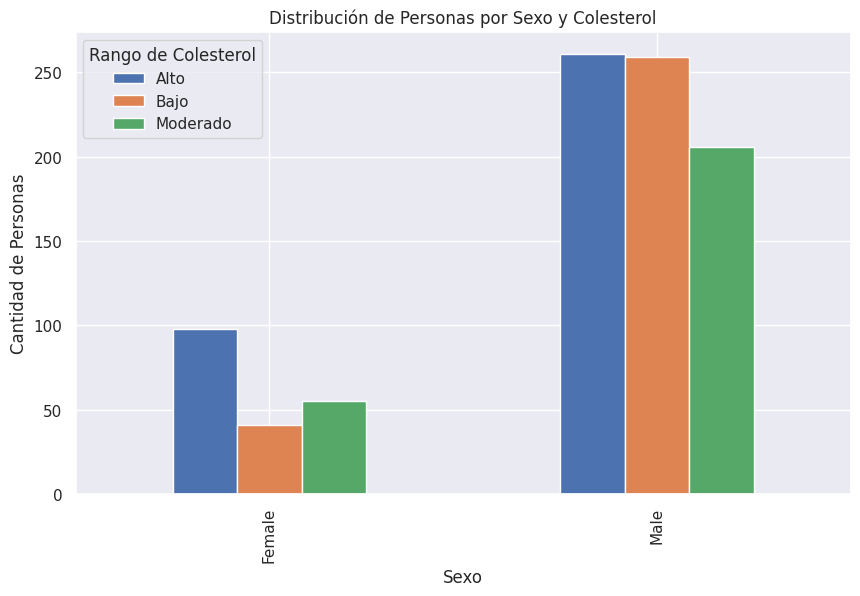

In [ ]:
graficos3 = pd.crosstab(df['sex'], df['Col_range'])

# Crear el gráfico de barras agrupado
graficos3.plot(kind='bar', figsize=(10, 6))

# Agregar título y etiquetas
plt.title('Distribución de Personas por Sexo y Colesterol')
plt.xlabel('Sexo')
plt.ylabel('Cantidad de Personas')
plt.legend(title='Rango de Colesterol')
plt.show()

**Información del grafico**

* La mayoría de los hombres en el conjunto de datos tienen niveles de colesterol alto y bajo, con una menor proporción de hombres en el rango moderado

* Los hombres tienen una mayor prevalencia en los rangos de colesterol alto y bajo, mientras que las mujeres están más concentradas en el rango de colesterol alto, con menos representación en los otros rangos

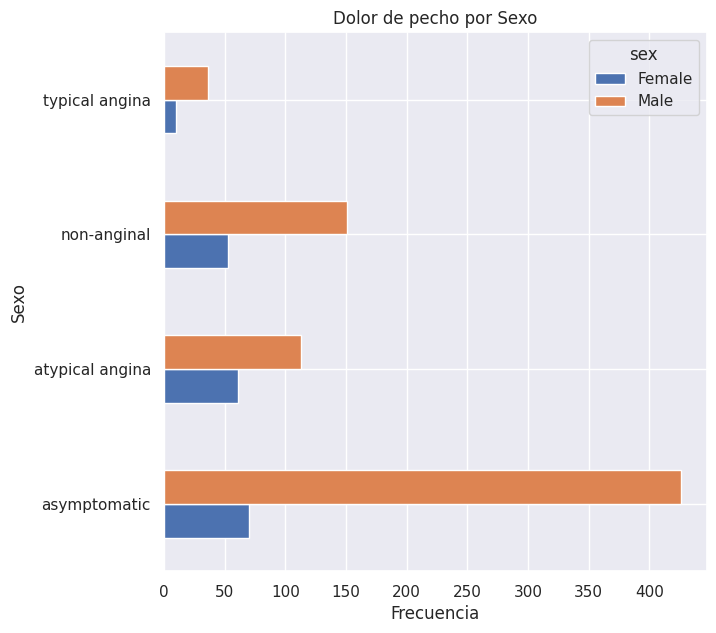

In [ ]:
graficos4 = pd.crosstab(df.cp, df.sex)
graficos4.plot.barh()

# Agregar título y etiquetas
plt.title('Dolor de pecho por Sexo')
plt.xlabel('Frecuencia')
plt.ylabel('Sexo')

# Mostrar el gráfico
plt.show()

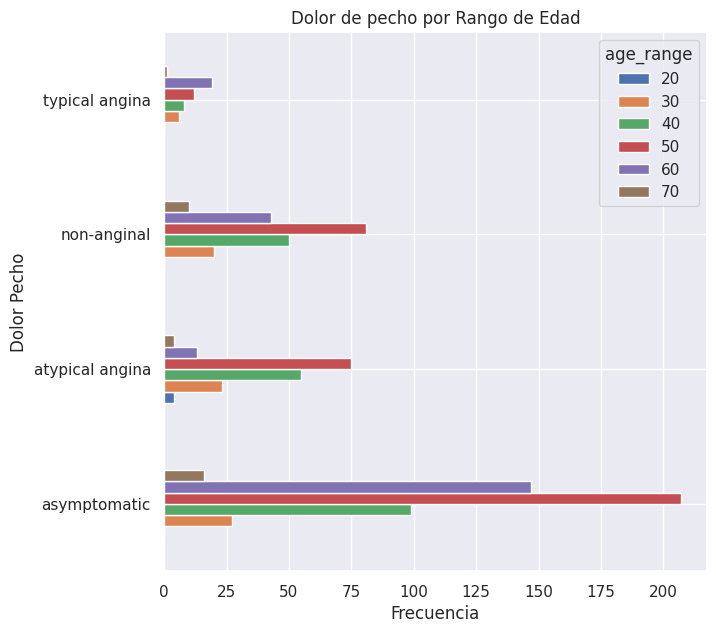

In [ ]:
graficos4 = pd.crosstab(df.cp, df.age_range)
graficos4.plot.barh()

# Agregar título y etiquetas
plt.title('Dolor de pecho por Rango de Edad')
plt.xlabel('Frecuencia')
plt.ylabel('Dolor Pecho')

# Mostrar el gráfico
plt.show()

<Figure size 2000x2000 with 0 Axes>

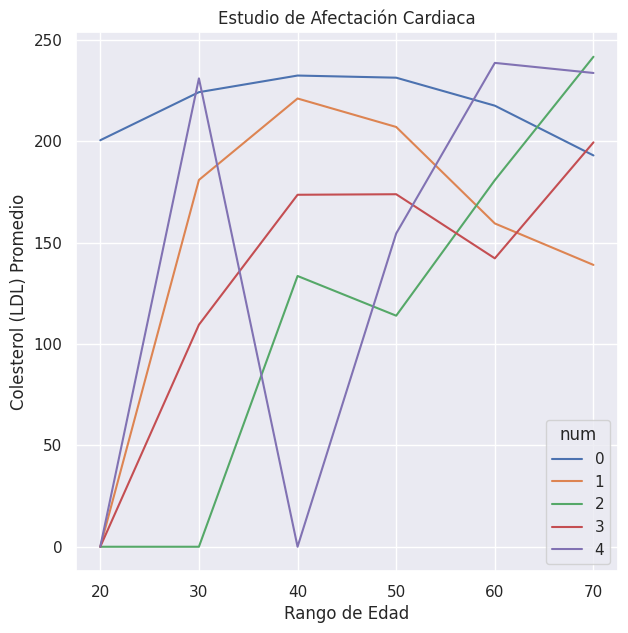

In [ ]:
# Ajustar el tamaño de la figura
plt.figure(figsize=(20, 20))

# Crear la tabla pivote con 'age_range' como índice y 'num' como columnas, y calcular el promedio de 'cholesterol'
round(df.pivot_table('chol', index='age_range', columns='num', aggfunc='mean', fill_value=0), 2).plot()

# Agregar el título y etiquetas de los ejes
plt.title("Estudio de Afectación Cardiaca")
plt.ylabel("Colesterol (LDL) Promedio")
plt.xlabel("Rango de Edad")

# Mostrar el gráfico
plt.show()

**Caracteristica trestbps**

In [ ]:
df['trestbps'].describe()

count    920.000000
mean     131.995652
std       18.451300
min        0.000000
25%      120.000000
50%      130.000000
75%      140.000000
max      200.000000
Name: trestbps, dtype: float64

Un valor cero no es correcto

**Caractersitca Colesterol**

In [ ]:
df['chol'].describe()

count    920.000000
mean     199.908696
std      109.040171
min        0.000000
25%      177.750000
50%      223.000000
75%      267.000000
max      603.000000
Name: chol, dtype: float64

Un valor cero no es correcto

**Dado el analisis valores en cero en estas caracteristicas no tienen sentido , se proceden a eliminar del dataset**


In [ ]:
# Eliminar las filas donde 'trestbps' o 'chol' sean iguales a 0
df = df[(df['trestbps'] != 0) & (df['chol'] != 0)]

# Verificar que las filas fueron eliminadas
print(df.head())

   id  age     sex    dataset               cp  trestbps   chol    fbs  \
0   1   63    Male  Cleveland   typical angina     145.0  233.0   True   
1   2   67    Male  Cleveland     asymptomatic     160.0  286.0  False   
2   3   67    Male  Cleveland     asymptomatic     120.0  229.0  False   
3   4   37    Male  Cleveland      non-anginal     130.0  250.0  False   
4   5   41  Female  Cleveland  atypical angina     130.0  204.0  False   

          restecg  thalch  exang  oldpeak        slope   ca  \
0  lv hypertrophy   150.0  False      2.3  downsloping  0.0   
1  lv hypertrophy   108.0   True      1.5         flat  3.0   
2  lv hypertrophy   129.0   True      2.6         flat  2.0   
3          normal   187.0  False      3.5  downsloping  0.0   
4  lv hypertrophy   172.0  False      1.4    upsloping  0.0   

                thal  num  age_range Col_range  
0       fixed defect    0         60  Moderado  
1             normal    2         60      Alto  
2  reversable defect    1    

In [ ]:
df['chol'].describe()

count    748.000000
mean     245.877005
std       57.530397
min       85.000000
25%      211.000000
50%      236.000000
75%      275.000000
max      603.000000
Name: chol, dtype: float64

In [ ]:
df['trestbps'].describe()

count    748.000000
mean     132.556150
std       17.226371
min       92.000000
25%      120.000000
50%      130.000000
75%      140.000000
max      200.000000
Name: trestbps, dtype: float64

In [ ]:
print("Numero de filas: "+ str(df.shape[0]))
print("Numero de Columnas: "+ str(df.shape[1]))

Numero de filas: 748
Numero de Columnas: 18


#### Feature Engineering (convirtiendo las variables categóricas en binarias numéricas)

** Convertir caracteristicas tipo string u object a tipo numerico**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 748 entries, 0 to 919
Data columns (total 18 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   id         748 non-null    int64  
 1   age        748 non-null    int64  
 2   sex        748 non-null    object 
 3   dataset    748 non-null    object 
 4   cp         748 non-null    object 
 5   trestbps   748 non-null    float64
 6   chol       748 non-null    float64
 7   fbs        748 non-null    bool   
 8   restecg    748 non-null    object 
 9   thalch     748 non-null    float64
 10  exang      748 non-null    bool   
 11  oldpeak    748 non-null    float64
 12  slope      748 non-null    object 
 13  ca         748 non-null    float64
 14  thal       748 non-null    object 
 15  num        748 non-null    int64  
 16  age_range  748 non-null    int64  
 17  Col_range  748 non-null    object 
dtypes: bool(2), float64(5), int64(4), object(7)
memory usage: 100.8+ KB


In [ ]:
df = df.drop('dataset', axis=1)

In [ ]:
# Verificar que la columna fue eliminada
df.head()

id  age     sex               cp  trestbps   chol    fbs         restecg  \
0   1   63    Male   typical angina     145.0  233.0   True  lv hypertrophy   
1   2   67    Male     asymptomatic     160.0  286.0  False  lv hypertrophy   
2   3   67    Male     asymptomatic     120.0  229.0  False  lv hypertrophy   
3   4   37    Male      non-anginal     130.0  250.0  False          normal   
4   5   41  Female  atypical angina     130.0  204.0  False  lv hypertrophy   

   thalch  exang  oldpeak        slope   ca               thal  num  \
0   150.0  False      2.3  downsloping  0.0       fixed defect    0   
1   108.0   True      1.5         flat  3.0             normal    2   
2   129.0   True      2.6         flat  2.0  reversable defect    1   
3   187.0  False      3.5  downsloping  0.0             normal    0   
4   172.0  False      1.4    upsloping  0.0             normal    0   

   age_range Col_range  
0         60  Moderado  
1         60      Alto  
2         60  Moderado  
3         30      Alto  
4         40  Moderado

**Descripcion del dataset despues de primeras transformaciones**

df.describe().T

In [ ]:
df.describe().T


count        mean         std   min     25%    50%     75%    max
id         748.0  407.774064  266.774247   1.0  187.75  374.5  561.25  920.0
age        748.0   52.883690    9.496063  28.0   46.00   54.0   59.00   77.0
trestbps   748.0  132.556150   17.226371  92.0  120.00  130.0  140.00  200.0
chol       748.0  245.877005   57.530397  85.0  211.00  236.0  275.00  603.0
thalch     748.0  141.029412   24.111614  69.0  125.00  140.0  160.00  202.0
oldpeak    748.0    0.867647    1.063485   0.0    0.00    0.5    1.50    6.2
ca         748.0    0.268717    0.677609   0.0    0.00    0.0    0.00    3.0
num        748.0    0.834225    1.102173   0.0    0.00    0.0    1.00    4.0
age_range  748.0   48.275401    9.863545  20.0   40.00   50.0   50.00   70.0

In [ ]:
df.columns

Index(['id', 'age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg',
       'thalch', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'num', 'age_range',
       'Col_range'],
      dtype='object')

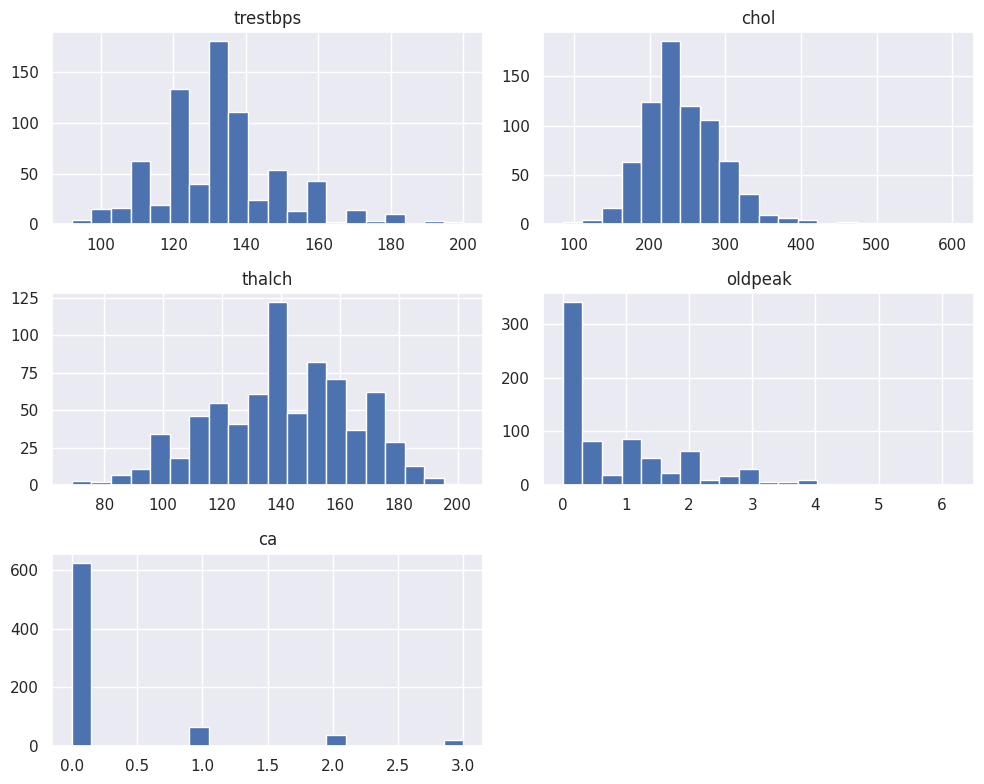

In [ ]:
# Seleccionar las columnas de tipo float
columnas_float = df.select_dtypes(include=['float64']).columns

# Crear histogramas para cada una de las columnas de tipo float
df[columnas_float].hist(bins=20, figsize=(10, 8))
plt.tight_layout()
plt.show()

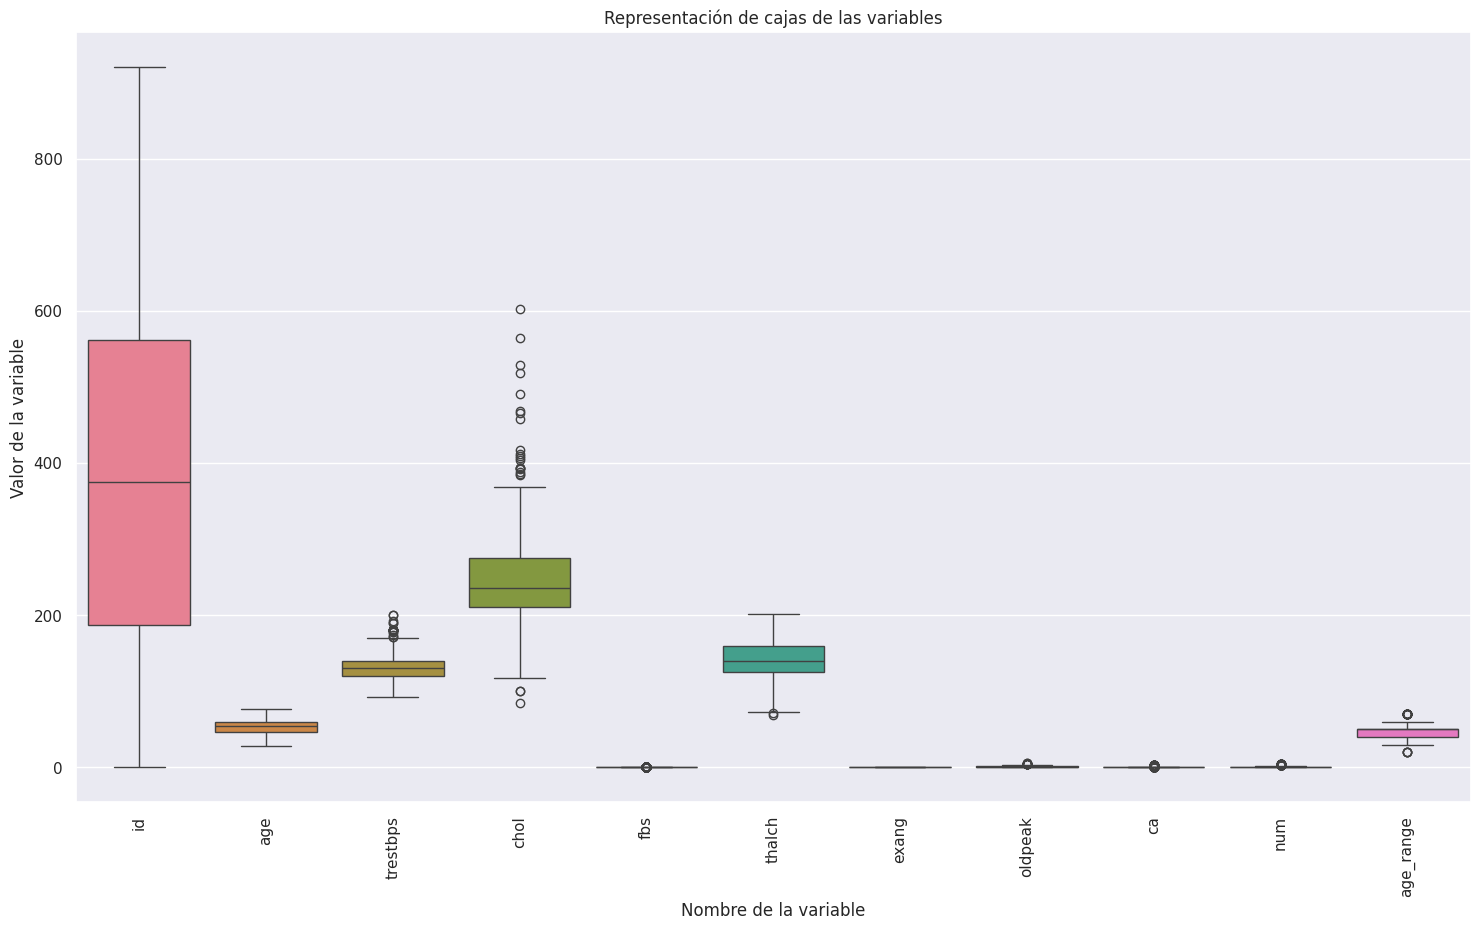

In [ ]:
#Se generan los graficos de caja/bigotes  Boxplots para ver los datos
plt.figure(figsize=(18,10))
ax = sns.boxplot(data=df)
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
plt.title(u'Representación de cajas de las variables')
plt.ylabel('Valor de la variable')
_ = plt.xlabel('Nombre de la variable')

**Los valores outliers** se van a mantener para no reducir la cantidad de observaciones, posteriormente se realizan tecnicas de normalizacion y estandarizacion de los datos, de manera que se les aplcia la estanadarizacion y/o normalizacion para que los valores atipicos / outliers no afecten de forma desproporcionadamente

In [ ]:
# Ver la frecuencia de las características tipo string (object)
for columna in df.select_dtypes(include=['object']).columns:
    print(f"Frecuencia de valores en la columna {columna}:")
    print(df[columna].value_counts())
    print("\n")

Frecuencia de valores en la columna sex:
sex
Male      565
Female    183
Name: count, dtype: int64


Frecuencia de valores en la columna cp:
cp
asymptomatic       370
non-anginal        170
atypical angina    167
typical angina      41
Name: count, dtype: int64


Frecuencia de valores en la columna restecg:
restecg
normal              446
lv hypertrophy      176
st-t abnormality    126
Name: count, dtype: int64


Frecuencia de valores en la columna slope:
slope
flat           541
upsloping      164
downsloping     43
Name: count, dtype: int64


Frecuencia de valores en la columna thal:
thal
normal               571
reversable defect    142
fixed defect          35
Name: count, dtype: int64


Frecuencia de valores en la columna Col_range:
Col_range
Alto        359
Moderado    261
Bajo        128
Name: count, dtype: int64




#### **Visualizacion de Caracteristicas**

In [ ]:
df1 = df.copy() # una copia del DF antes de realizar los cambios

In [ ]:
# Convertir la columna 'sex' a numérica
df1['sex'] = df1['sex'].replace({'Male': 1, 'Female': 0})

# Convertir la columna 'cp' a numérica
df1['cp'] = df1['cp'].replace({'asymptomatic': 3, 'non-anginal': 2, 'atypical angina': 1, 'typical angina': 0})

# Convertir la columna 'restecg' a numérica
df1['restecg'] = df1['restecg'].replace({'normal': 0, 'lv hypertrophy': 1, 'st-t abnormality': 2})

# Convertir la columna 'slope' a numérica
df1['slope'] = df1['slope'].replace({'flat': 1, 'upsloping': 2, 'downsloping': 0})

# Convertir la columna 'thal' a numérica
df1['thal'] = df1['thal'].replace({'normal': 0, 'reversable defect': 1, 'fixed defect': 2})

# Convertir la columna 'Col_range' a numérica
df1['Col_range'] = df1['Col_range'].replace({'Bajo': 0, 'Moderado': 1, 'Alto': 2})

# Convertir la columna 'fbs' a binario
df1['fbs'] = df1['fbs'].replace({True: 1, False: 0})

# Convertir la columna 'exang' a binario
df1['exang'] = df1['exang'].replace({True: 1, False: 0})

In [ ]:
# Verificar que la columna fue eliminada
df1.head()

id  age  sex  cp  trestbps   chol  fbs  restecg  thalch  exang  oldpeak  \
0   1   63    1   0     145.0  233.0    1        1   150.0      0      2.3   
1   2   67    1   3     160.0  286.0    0        1   108.0      1      1.5   
2   3   67    1   3     120.0  229.0    0        1   129.0      1      2.6   
3   4   37    1   2     130.0  250.0    0        0   187.0      0      3.5   
4   5   41    0   1     130.0  204.0    0        1   172.0      0      1.4   

   slope   ca  thal  num  age_range  Col_range  
0      0  0.0     2    0         60          1  
1      1  3.0     0    2         60          2  
2      1  2.0     1    1         60          1  
3      0  0.0     0    0         30          2  
4      2  0.0     0    0         40          1

### Correlaciones


In [ ]:
# Generar la tabla de correlación
correlacion = df1.corr()

# Mostrar la tabla de correlación
print(correlacion)

                 id       age       sex        cp  trestbps      chol  \
id         1.000000  0.195458  0.240768  0.168717  0.078403 -0.015206   
age        0.195458  1.000000  0.042182  0.174031  0.232040  0.083604   
sex        0.240768  0.042182  1.000000  0.148588  0.023625 -0.093176   
cp         0.168717  0.174031  0.148588  1.000000  0.043506  0.095427   
trestbps   0.078403  0.232040  0.023625  0.043506  1.000000  0.084248   
chol      -0.015206  0.083604 -0.093176  0.095427  0.084248  1.000000   
fbs        0.201731  0.251357  0.091310  0.035124  0.160203  0.049597   
restecg    0.219914  0.208687  0.023288  0.084048  0.081660  0.011331   
thalch    -0.399818 -0.350529 -0.140633 -0.338236 -0.114056 -0.042606   
exang      0.164853  0.186743  0.154186  0.432203  0.157600  0.088041   
oldpeak    0.017863  0.255383  0.110844  0.285487  0.195473  0.052193   
slope     -0.352770 -0.063584 -0.120510 -0.124725 -0.100423 -0.002142   
ca        -0.373947  0.258886 -0.017566  0.129250  

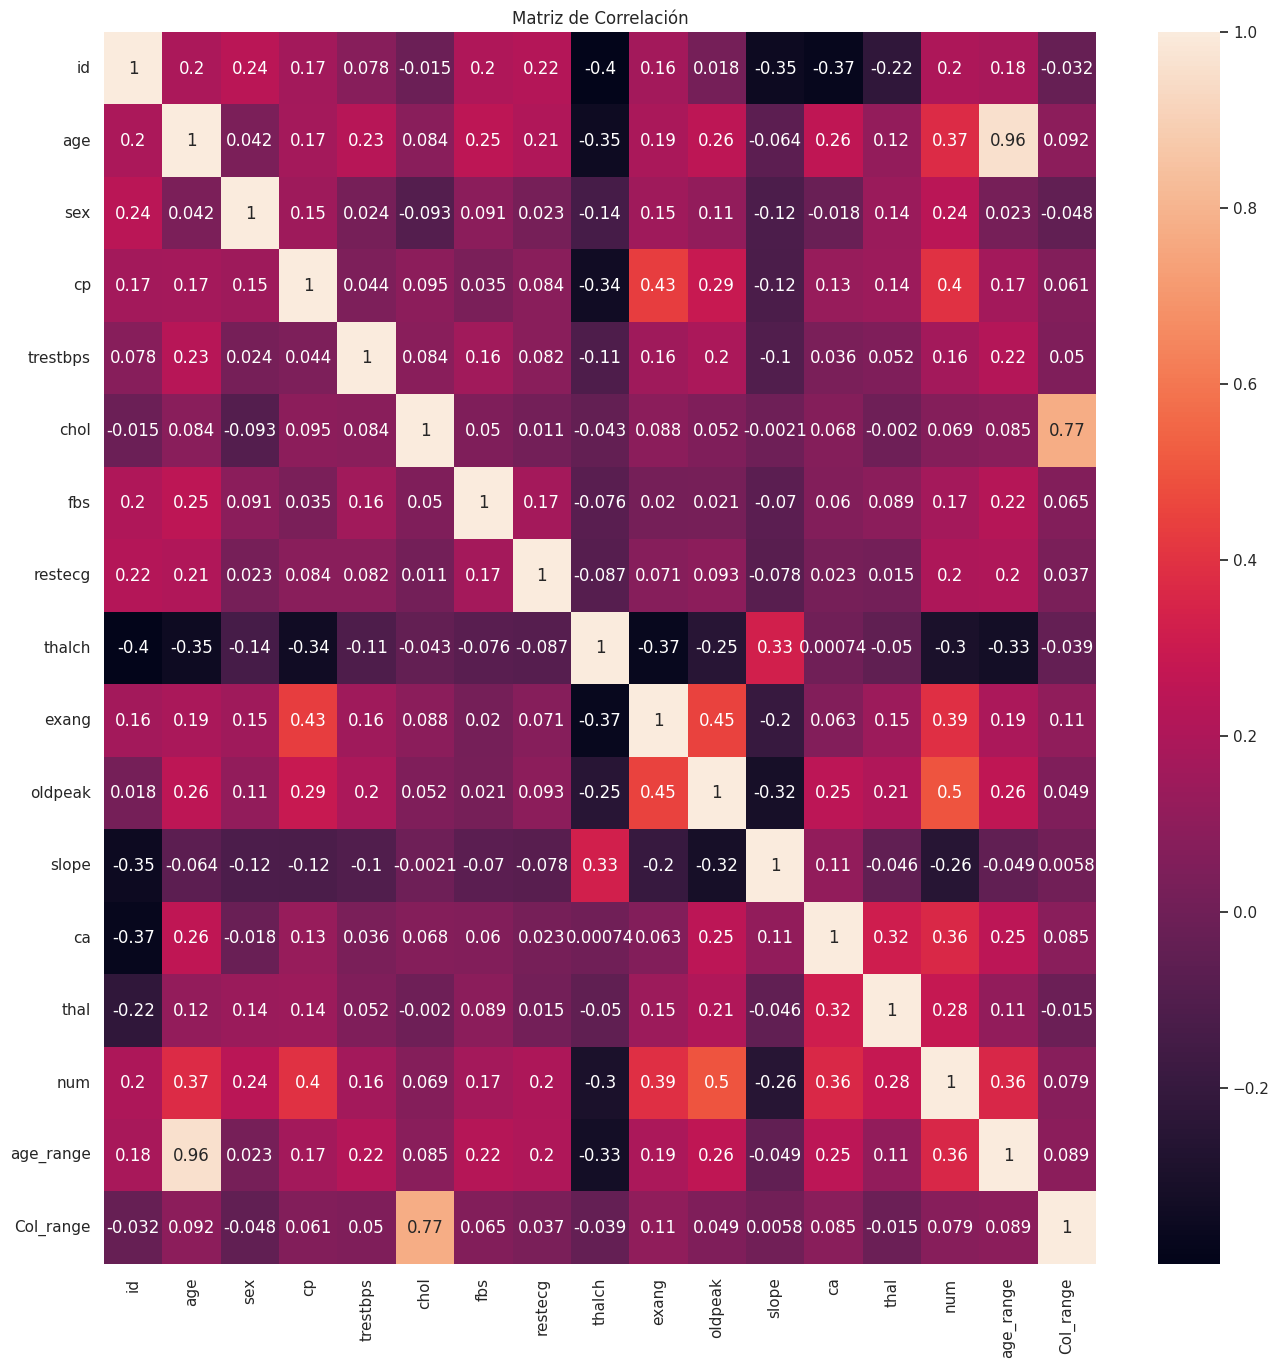

In [ ]:
#creacion de la matriz de correlación

correlation_mat = df1.corr()
plt.figure(figsize=(16,16))
plt.title("Matriz de Correlación")
sns.heatmap(correlation_mat, annot=True)
plt.show()

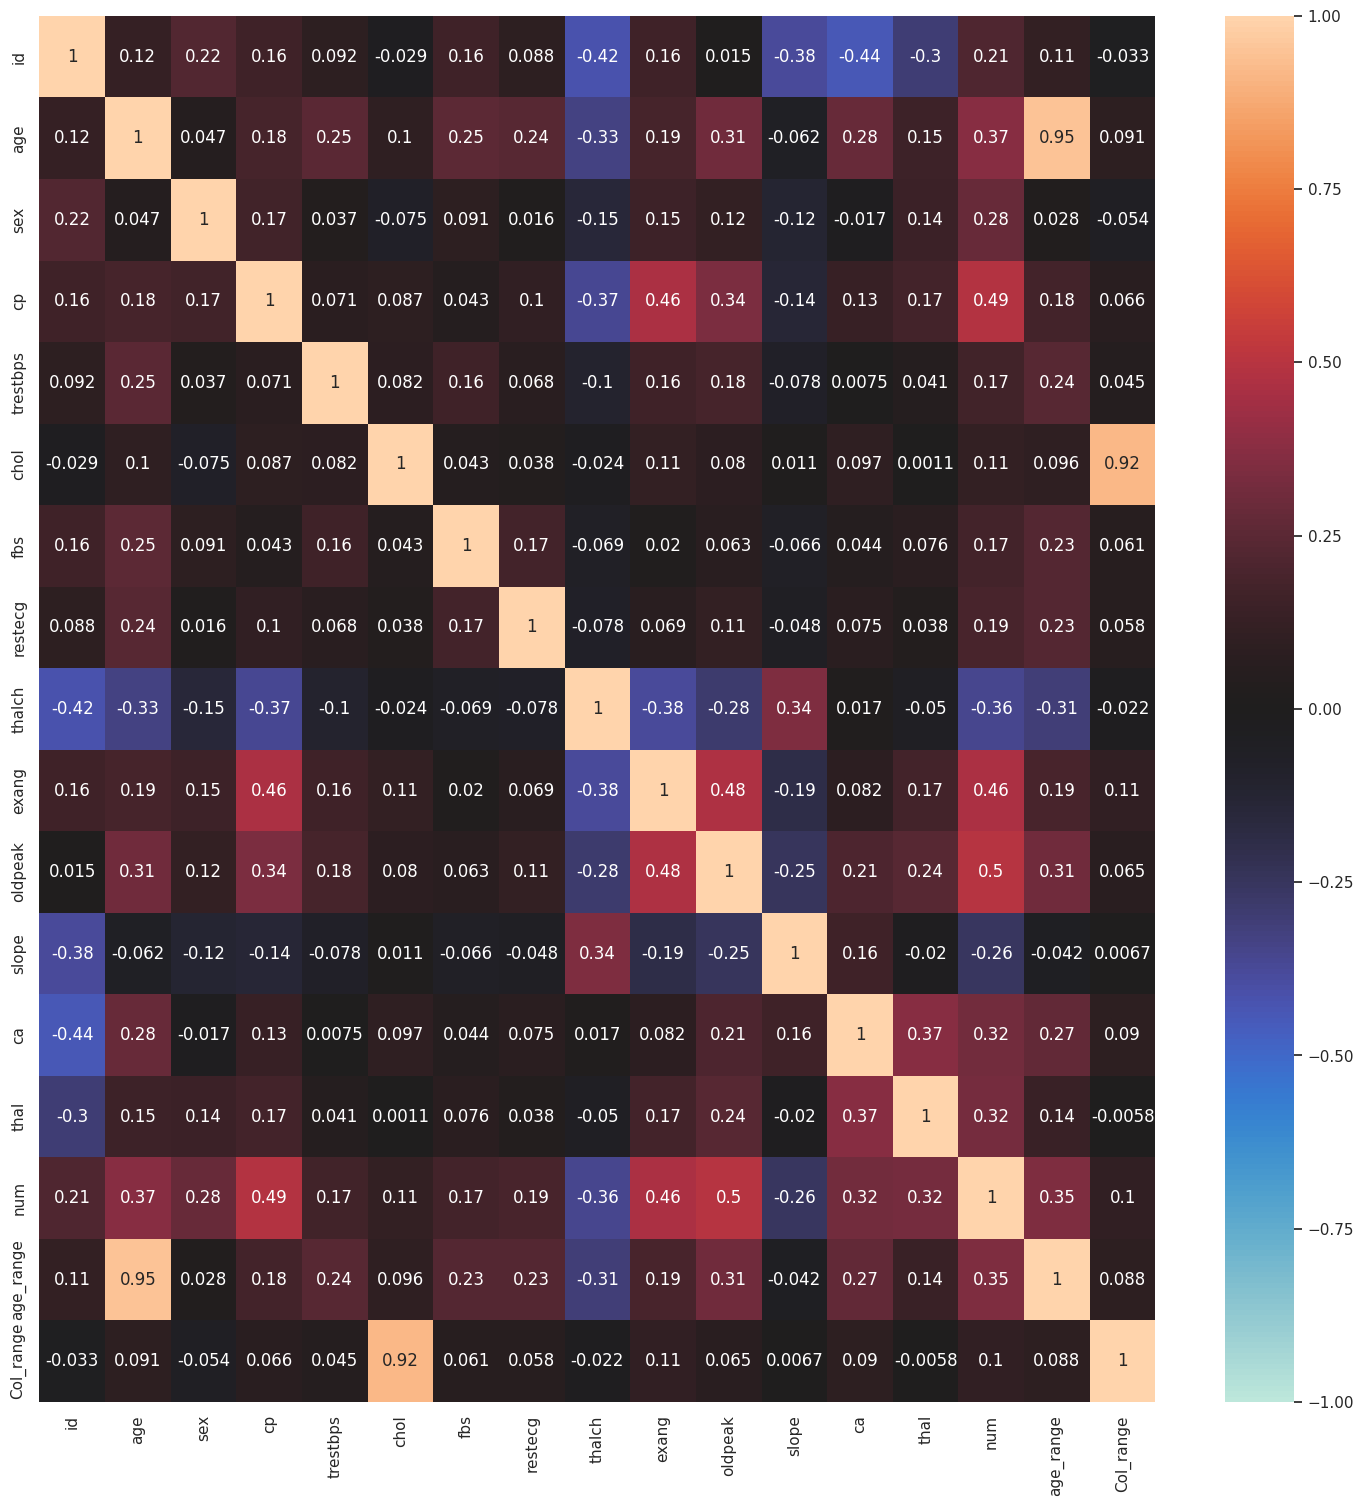

In [ ]:
f,ax = plt.subplots(figsize=(18,18))
sns.heatmap(df1.corr(method='spearman'),annot=True,vmin=-1, vmax=1, center= 0);

* ## **Correlación positiva**
**chol y Col_range: 0.92
num y cp: 0.49
oldpeak y exang: 0.48
thalch y cp: 0.46
num y age: 0.37
thal y ca: 0.37
age y oldpeak: 0.31
sex y num: 0.28 (es cercano a 0.3)**
* ## **Correlación negativa**
**thalch y age: -0.37
ca y id: -0.44
thalch y num: -0.36
exang y thalch: -0.38
cp y thalch: -0.37**

In [ ]:
# Calcular la matriz de correlaciones
matriz_correlaciones = df1.corr()

# Correlación de las variables con la target 'num'
correlaciones_target = matriz_correlaciones['num'].values

# Obtener los índices de las correlaciones ordenados de mayor a menor en valor absoluto
indices_inversos = abs(correlaciones_target).argsort()[::-1]

# Crear un diccionario para almacenar las correlaciones con la target
diccionario = {}
X = df1  # Incluye todas las columnas, incluyendo 'num'
for nombre, correlacion in zip(X.columns[indices_inversos], correlaciones_target[indices_inversos]):
    diccionario[nombre] = correlacion

# Mostrar el resultado como DataFrame
resultado = pd.DataFrame.from_dict(diccionario, orient='index', columns=['Correlación con la target'])
print(resultado)

           Correlación con la target
num                         1.000000
oldpeak                     0.500220
cp                          0.395570
exang                       0.392782
age                         0.374962
ca                          0.360861
age_range                   0.359093
thalch                     -0.301202
thal                        0.278874
slope                      -0.256885
sex                         0.241872
restecg                     0.198855
id                          0.197704
fbs                         0.171573
trestbps                    0.163787
Col_range                   0.078635
chol                        0.069475


In [ ]:
# Correlación de las variables con la target 'num'
# Aquí obtenemos directamente las correlaciones con 'num', sin necesidad de usar índices
correlaciones_target = matriz_correlaciones['num'].values[:-1]

# Obtener los índices de las correlaciones ordenados de mayor a menor en valor absoluto
indices_inversos = abs(correlaciones_target).argsort()[::-1]

# Crear un diccionario para almacenar las correlaciones con la target 'num'
diccionario = {}
# Aquí utilizamos X como el DataFrame sin la columna 'num'
X = df1.drop(columns=['num'])  # Excluimos 'num' para no calcular su correlación consigo misma
for nombre, correlacion in zip(X.columns[indices_inversos], list(correlaciones_target[indices_inversos])):
    diccionario[nombre] = correlacion

# Mostrar el resultado como DataFrame
resultado = pd.DataFrame.from_dict(diccionario, orient='index', columns=['Correlación con la target'])
print(resultado)

           Correlación con la target
age_range                   1.000000
oldpeak                     0.500220
cp                          0.395570
exang                       0.392782
age                         0.374962
ca                          0.360861
Col_range                   0.359093
thalch                     -0.301202
thal                        0.278874
slope                      -0.256885
sex                         0.241872
restecg                     0.198855
id                          0.197704
fbs                         0.171573
trestbps                    0.163787
chol                        0.069475


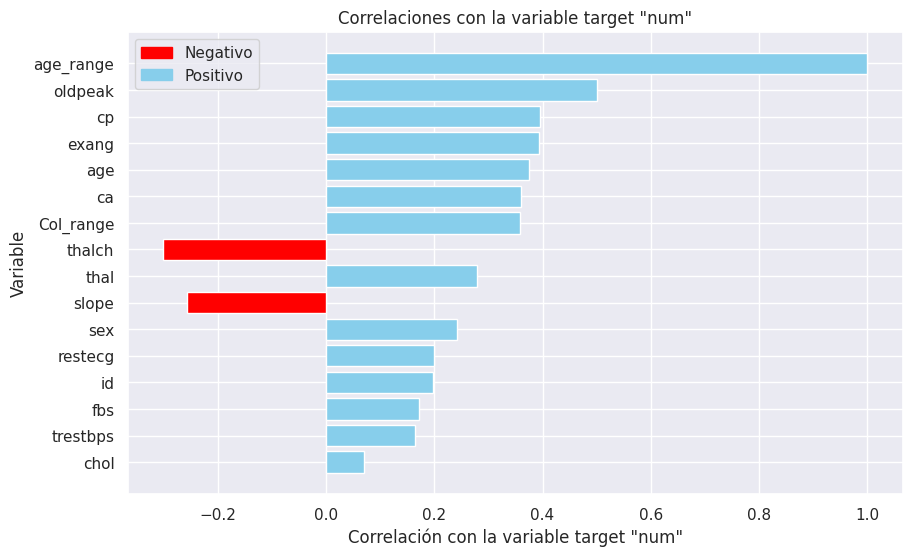

In [ ]:
# Definir los datos para el gráfico de barras
nombres_columnas = list(diccionario.keys())
correlaciones = list(diccionario.values())

# Crear el gráfico de barras
plt.figure(figsize=(10, 6))
# Usar 'red' para las correlaciones negativas y 'skyblue' para las positivas
colors = ['red' if c < 0 else 'skyblue' for c in correlaciones]
bars = plt.barh(nombres_columnas, correlaciones, color=colors)

plt.xlabel('Correlación con la variable target "num"')
plt.ylabel('Variable')
plt.title('Correlaciones con la variable target "num"')
plt.gca().invert_yaxis()  # Invertir el eje y para mostrar la variable más correlacionada en la parte superior

# Crear los parches para la leyenda, uno para rojo y otro para azul claro
import matplotlib.patches as mpatches
red_patch = mpatches.Patch(color='red', label='Negativo')
blue_patch = mpatches.Patch(color='skyblue', label='Positivo')
plt.legend(handles=[red_patch, blue_patch])

plt.show()

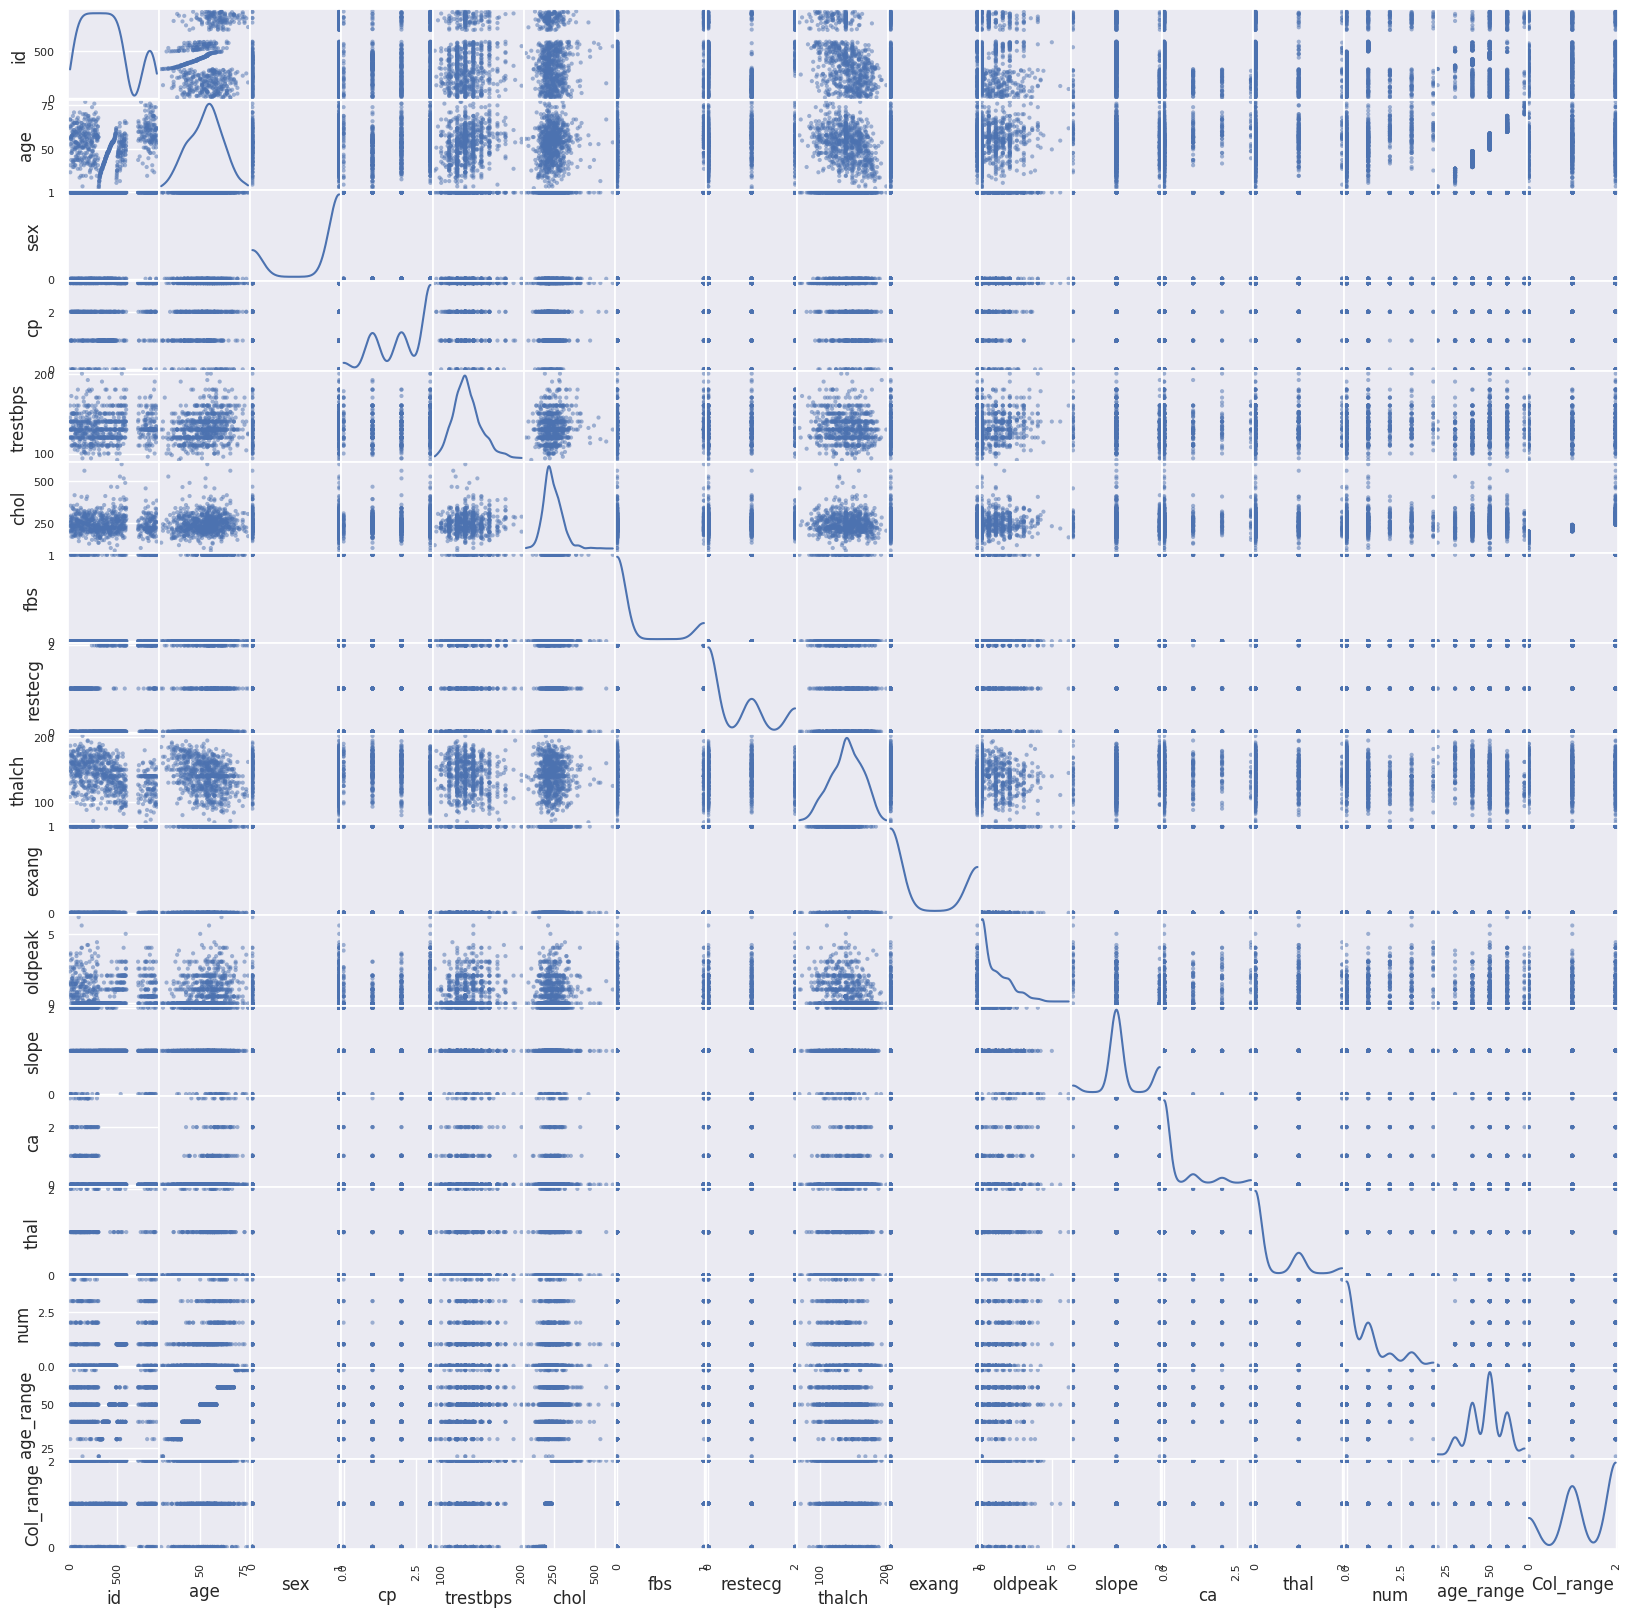

In [ ]:
# Generar la scatter matrix
scatter_matrix(df1, figsize=(20, 20), diagonal='kde')

# Mostrar el gráfico
plt.show()

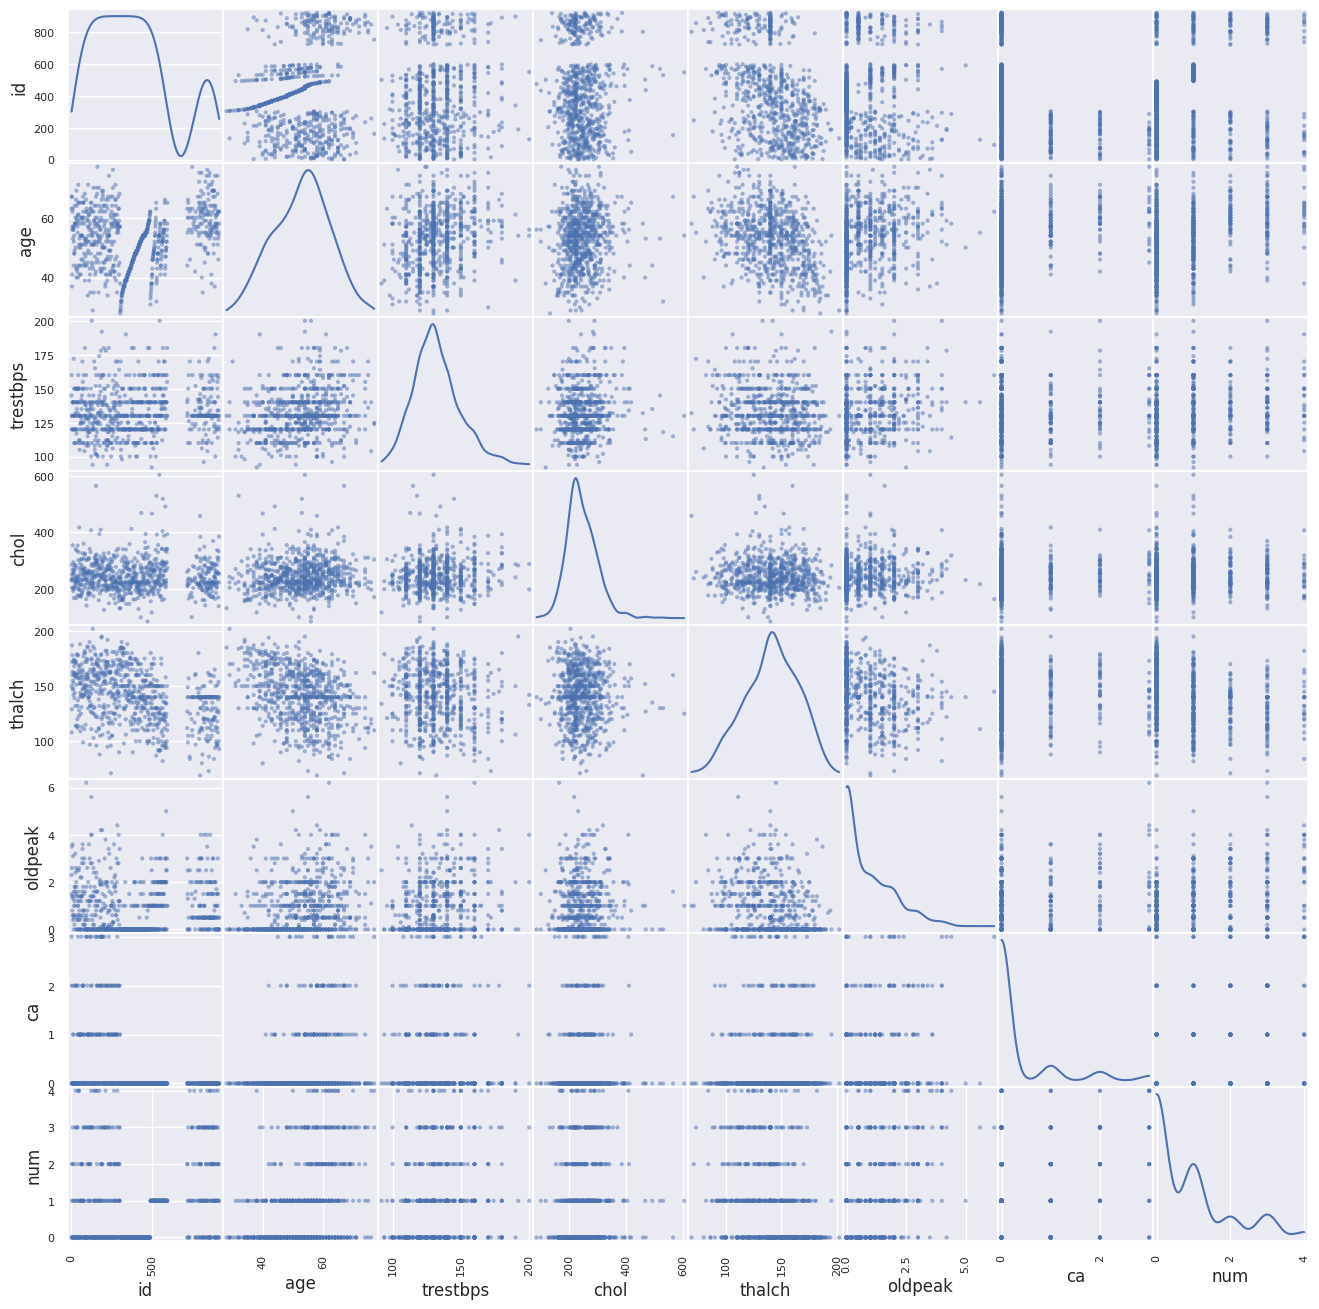

In [ ]:
# Seleccionar solo las columnas de interés
columnas_numericas = ['id', 'age', 'trestbps', 'chol', 'thalch', 'oldpeak', 'ca', 'num']

# Crear un nuevo DataFrame con esas columnas
df_numericas = df1[columnas_numericas]

# Generar la scatter matrix con un tamaño de 16x16
scatter_matrix(df_numericas, figsize=(16, 16), diagonal='kde')

# Mostrar el gráfico
plt.show()

## **Modelado**

En este caso la caracteristica a ser buscada es Num

In [ ]:
df2 = df1.copy()

In [ ]:
# Lista de columnas que se van a mantener
columnas_mantener = ['oldpeak', 'cp', 'exang', 'age', 'ca', 'thalch', 'thal', 'slope', 'sex','num']

# Seleccionar solo esas columnas en df1
df2= df2[columnas_mantener]

# Verificar el DataFrame resultante
print(df2.head())

   oldpeak  cp  exang  age   ca  thalch  thal  slope  sex  num
0      2.3   0      0   63  0.0   150.0     2      0    1    0
1      1.5   3      1   67  3.0   108.0     0      1    1    2
2      2.6   3      1   67  2.0   129.0     1      1    1    1
3      3.5   2      0   37  0.0   187.0     0      0    1    0
4      1.4   1      0   41  0.0   172.0     0      2    0    0


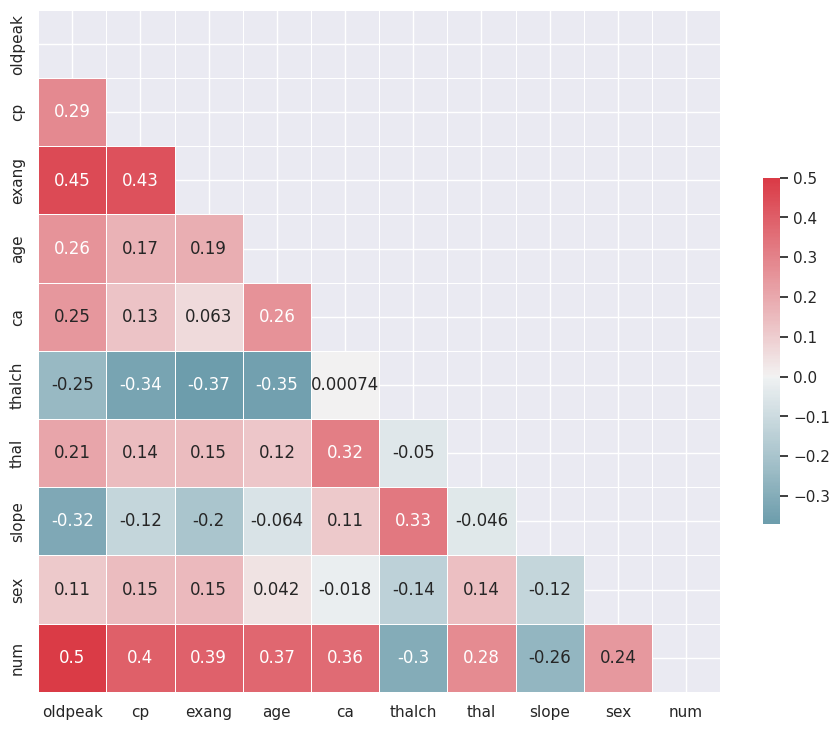

In [ ]:
# Calcular la matriz de correlación
corr = df2.corr()

# Crear la máscara
mask = np.zeros_like(corr, dtype=bool)  # Cambiar np.bool a bool
mask[np.triu_indices_from(mask)] = True

# Configurar el gráfico
f, ax = plt.subplots(figsize=(11, 9))
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Graficar el mapa de calor
sns.heatmap(corr, mask=mask, cmap=cmap, center=0, square=True, linewidths=.5, cbar_kws={'shrink': .5}, annot=True)
plt.show()

In [ ]:
# definri la caracteristica target

X = df2.drop(columns=['num'])  # Excluir la columna target 'num' de las variables predictoras
Y = df2['num']

In [ ]:
X.head()

oldpeak  cp  exang  age   ca  thalch  thal  slope  sex
0      2.3   0      0   63  0.0   150.0     2      0    1
1      1.5   3      1   67  3.0   108.0     0      1    1
2      2.6   3      1   67  2.0   129.0     1      1    1
3      3.5   2      0   37  0.0   187.0     0      0    1
4      1.4   1      0   41  0.0   172.0     0      2    0

### estandarización

Esto se procede a aplica segun lo visto en el curso, detalle : Como se comenta en la unidad, hay modelos que parten de la hipótesis que los datos son centrados y, por tanto, se necesita estandarizar. Suele ser una buena práctica porque no suele perjudicar.

Además, la inversa se puede realizar de forma sencilla.

In [ ]:
obj_escalar = StandardScaler()
X_estandarizado = obj_escalar.fit_transform(X)

### División en train y test:

Esta división consiste en separar los datos disponibles en dos conjuntos distintos: uno para entrenar el modelo (conjunto de entrenamiento) y otro para evaluar su rendimiento (conjunto de prueba), con esto se busca mejorar el rendimiento del modelo, debido a que ayuda a mejorar la generalización del modelo y su aplicabilidad en situaciones del mundo real.

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X_estandarizado, Y, test_size=0.2, random_state=0)

In [ ]:
print(type(X_train))

<class 'numpy.ndarray'>


In [ ]:
# Mostrar las primeras 5 filas de X_train
print(X_train[:5])

[[ 1.63002985  0.87822792 -0.72992252  0.7498973   2.55669856  0.662804
   1.31559196 -0.32316112 -1.7571089 ]
 [-0.81639865  0.87822792 -0.72992252 -0.30387535 -0.39683121  0.37229322
  -0.52034607 -0.32316112  0.56911669]
 [ 0.68909581  0.87822792  1.37000842 -0.19849808 -0.39683121  1.32682863
   1.31559196  1.67456218  0.56911669]
 [-0.81639865 -1.21719309 -0.72992252 -0.51462987 -0.39683121 -0.87275296
  -0.52034607 -0.32316112 -1.7571089 ]
 [ 0.12453539  0.87822792  1.37000842  0.4337655  -0.39683121 -1.86878991
  -0.52034607 -0.32316112  0.56911669]]


In [ ]:
Y.value_counts()

num
0    391
1    203
3     69
2     63
4     22
Name: count, dtype: int64

**Librerias de Modelado**

In [ ]:
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

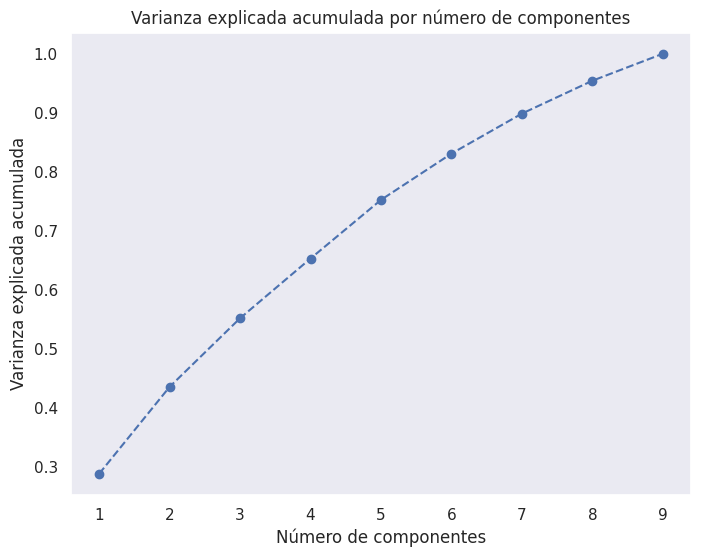

In [ ]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Ajustar PCA
pca = PCA().fit(X_train)

# Varianza explicada acumulada
varianza_acumulada = pca.explained_variance_ratio_.cumsum()

# Graficar la varianza acumulada
plt.figure(figsize=(8,6))
plt.plot(range(1, len(varianza_acumulada)+1), varianza_acumulada, marker='o', linestyle='--')
plt.title('Varianza explicada acumulada por número de componentes')
plt.xlabel('Número de componentes')
plt.ylabel('Varianza explicada acumulada')
plt.grid()
plt.show()

**Explicacin del gráfico**

* Los primeros 2 o 3 componentes explican aproximadamente entre un 60% y 70% de la varianza total.
A medida que se añaden más componentes, se alcanza cerca del 90% de la varianza explicada en torno al componente 7.
* Por lo que entonces tenemos que en este gráfico nos indica que después de aproximadamente 6 o 7 componentes, agregar más componentes no tendría un impacto significativo y/ sustanial para la calidad de prediccion de los modelos.

In [ ]:
# Lista de modelos
models = []
models.append(('LR', LogisticRegression(solver='liblinear', multi_class='ovr')))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVC', SVC()))

# Inicializar resultados y nombres
resultados = []
names = []

# Evaluar los modelos
for name, model in models:
    kfold = StratifiedKFold(n_splits=10, random_state=1, shuffle=True)
    cv_resultados = cross_val_score(model, X_train, Y_train, cv=kfold, scoring='accuracy')
    resultados.append(cv_resultados)
    names.append(name)
    print('%s: Accuracy = %f (Std = %f)' % (name, cv_resultados.mean(), cv_resultados.std()))

# Inicializar nombres y resultados de accuracy
names = []
accuracies = []

# Evaluar los modelos
for name, model in models:
    kfold = StratifiedKFold(n_splits=10, random_state=1, shuffle=True)
    cv_resultados = cross_val_score(model, X_train, Y_train, cv=kfold, scoring='accuracy')
    accuracies.append(cv_resultados.mean())
    names.append(name)

# Crear un DataFrame para mostrar los resultados de accuracy
accuracies_test1 = pd.DataFrame(accuracies, columns=['Accuracy_Test1'], index=names)

# Mostrar la tabla de resultados de accuracy
# se almacena el resultado para realizar un acomparacion con las diferentes corridas y pruebas
print(accuracies_test1)

LR: Accuracy = 0.640621 (Std = 0.039760)
LDA: Accuracy = 0.647316 (Std = 0.049254)
KNN: Accuracy = 0.618785 (Std = 0.038755)
CART: Accuracy = 0.558644 (Std = 0.054614)
NB: Accuracy = 0.618955 (Std = 0.072338)
SVC: Accuracy = 0.643983 (Std = 0.050137)
      Accuracy_Test1
LR          0.640621
LDA         0.647316
KNN         0.618785
CART        0.555311
NB          0.618955
SVC         0.643983


In [ ]:
df3 = df1.copy()

In [ ]:
# Lista de columnas que se van a mantener
columnas_mantener = ['oldpeak', 'cp', 'exang', 'age', 'ca', 'thalch','num']

# Seleccionar solo esas columnas en df1
df3= df3[columnas_mantener]

# Verificar el DataFrame resultante
print(df3.head())

   oldpeak  cp  exang  age   ca  thalch  num
0      2.3   0      0   63  0.0   150.0    0
1      1.5   3      1   67  3.0   108.0    2
2      2.6   3      1   67  2.0   129.0    1
3      3.5   2      0   37  0.0   187.0    0
4      1.4   1      0   41  0.0   172.0    0


In [ ]:
# definri la caracteristica target

X = df3.drop(columns=['num'])  # Excluir la columna target 'num' de las variables predictoras
Y = df3['num']

In [ ]:
obj_escalar = StandardScaler()
X_estandarizado = obj_escalar.fit_transform(X)

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X_estandarizado, Y, test_size=0.2, random_state=0)

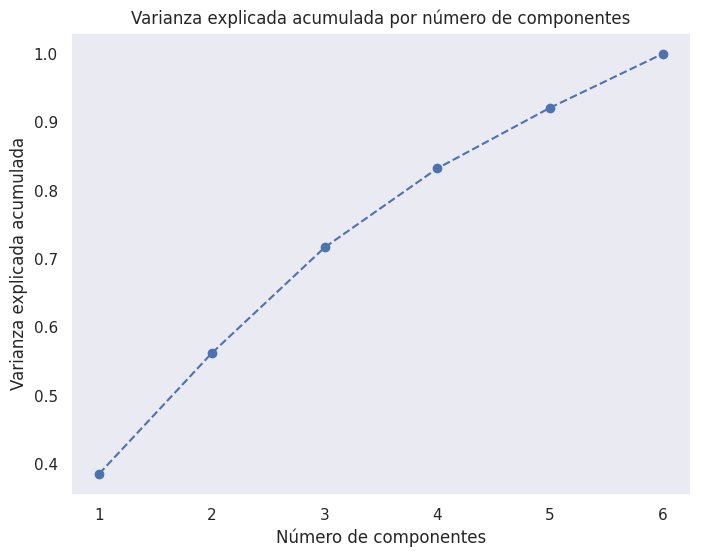

In [ ]:
# Ajustar PCA
pca = PCA().fit(X_train)

# Varianza explicada acumulada
varianza_acumulada = pca.explained_variance_ratio_.cumsum()

# Graficar la varianza acumulada
plt.figure(figsize=(8,6))
plt.plot(range(1, len(varianza_acumulada)+1), varianza_acumulada, marker='o', linestyle='--')
plt.title('Varianza explicada acumulada por número de componentes')
plt.xlabel('Número de componentes')
plt.ylabel('Varianza explicada acumulada')
plt.grid()
plt.show()

In [ ]:
# Lista de modelos
models = []
models.append(('LR', LogisticRegression(solver='liblinear', multi_class='ovr')))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVC', SVC()))

# Inicializar resultados y nombres
resultados = []
names = []

# Evaluar los modelos
for name, model in models:
    kfold = StratifiedKFold(n_splits=10, random_state=1, shuffle=True)
    cv_resultados = cross_val_score(model, X_train, Y_train, cv=kfold, scoring='accuracy')
    resultados.append(cv_resultados)
    names.append(name)
    print('%s: Accuracy = %f (Std = %f)' % (name, cv_resultados.mean(), cv_resultados.std()))

# Inicializar nombres y resultados de accuracy
names = []
accuracies = []

# Evaluar los modelos
for name, model in models:
    kfold = StratifiedKFold(n_splits=10, random_state=1, shuffle=True)
    cv_resultados = cross_val_score(model, X_train, Y_train, cv=kfold, scoring='accuracy')
    accuracies.append(cv_resultados.mean())
    names.append(name)

# Crear un DataFrame para mostrar los resultados de accuracy
accuracies_test2 = pd.DataFrame(accuracies, columns=['Accuracy_Test2'], index=names)

# Mostrar la tabla de resultados de accuracy
# se almacena el resultado para realizar un acomparacion con las diferentes corridas y pruebas
print(accuracies_test2)

LR: Accuracy = 0.642232 (Std = 0.040166)
LDA: Accuracy = 0.640508 (Std = 0.046385)
KNN: Accuracy = 0.598729 (Std = 0.050542)
CART: Accuracy = 0.558559 (Std = 0.059464)
NB: Accuracy = 0.617090 (Std = 0.063650)
SVC: Accuracy = 0.640593 (Std = 0.042003)
      Accuracy_Test2
LR          0.642232
LDA         0.640508
KNN         0.598729
CART        0.561921
NB          0.617090
SVC         0.640593


**1. Ajuste de class_weight='balanced' en los modelos:**


In [ ]:
model = LogisticRegression(solver='liblinear', multi_class='ovr', class_weight='balanced')
model.fit(X_train, Y_train)

LogisticRegression(class_weight='balanced', multi_class='ovr',
                   solver='liblinear')

**2. Aplicar SMOTE para Sobremuestreo:**

In [ ]:
from imblearn.over_sampling import SMOTE

smote = SMOTE()
X_train_balanced, Y_train_balanced = smote.fit_resample(X_train, Y_train)

# Entrenar el modelo con los datos balanceados
model = LogisticRegression(solver='liblinear', multi_class='ovr')
model.fit(X_train_balanced, Y_train_balanced)

LogisticRegression(multi_class='ovr', solver='liblinear')

**3. Aplicar Submuestreo:**

In [ ]:
from imblearn.under_sampling import RandomUnderSampler

undersample = RandomUnderSampler()
X_train_balanced, Y_train_balanced = undersample.fit_resample(X_train, Y_train)

# Entrenar el modelo
model = LogisticRegression(solver='liblinear', multi_class='ovr')
model.fit(X_train_balanced, Y_train_balanced)

LogisticRegression(multi_class='ovr', solver='liblinear')

In [ ]:
# Lista de modelos
models = []
models.append(('LR', LogisticRegression(solver='liblinear', multi_class='ovr', class_weight='balanced')))
models.append(('KNN', KNeighborsClassifier()))
models.append(('SVC', SVC(class_weight='balanced')))

# Sobremuestreo con SMOTE
smote = SMOTE()
X_train_balanced, Y_train_balanced = smote.fit_resample(X_train, Y_train)

# Evaluación
for name, model in models:
    kfold = StratifiedKFold(n_splits=10, random_state=1, shuffle=True)
    cv_resultados_balanced = cross_val_score(model, X_train_balanced, Y_train_balanced, cv=kfold, scoring='accuracy')
    print('%s: Accuracy = %f (Std = %f)' % (name, cv_resultados_balanced.mean(), cv_resultados_balanced.std()))

LR: Accuracy = 0.517507 (Std = 0.034220)
KNN: Accuracy = 0.765512 (Std = 0.030230)
SVC: Accuracy = 0.643653 (Std = 0.036508)


### Aplicación de un modelo de redes neuronales
#### **Entrenar el modelo de red neuronal:**

In [ ]:
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
# Inicializar el modelo
ann_model = MLPClassifier(hidden_layer_sizes=(100,), max_iter=500, activation='relu', solver='adam', random_state=1)
# Inicializar el modelo
ann_model.fit(X_train_scaled, Y_train)

# Entrenar el modelo con los datos
ann_model.fit(X_train, Y_train)

MLPClassifier(max_iter=500, random_state=1)

**Evaluar el modelo**

In [ ]:
accuracy_ann = ann_model.score(X_test_scaled, Y_test)

print("Accuracy del modelo de redes neuronales (ANN): ", accuracy_ann)

Accuracy del modelo de redes neuronales (ANN):  0.5733333333333334


In [ ]:
# Crear un DataFrame con el resultado de la red neuronal
df_ann = pd.DataFrame({'Accuracy_Test1': [accuracy_ann]}, index=['ANN'])

# Concatenar el DataFrame de la red neuronal con accuracies_test1
accuracies_test1 = pd.concat([accuracies_test1, df_ann])

# Mostrar la tabla con los resultados actualizados
print(accuracies_test1)

      Accuracy_Test1
LR          0.640621
LDA         0.647316
KNN         0.618785
CART        0.555311
NB          0.618955
SVC         0.643983
ANN         0.573333


#### *Aumentar la complejidad de la red:*

In [ ]:
from sklearn.neural_network import MLPClassifier

# Aumentar capas ocultas y el número de iteraciones
ann_model = MLPClassifier(hidden_layer_sizes=(150, 100, 50), max_iter=1000, activation='relu', solver='adam', random_state=1)
ann_model.fit(X_train_scaled, Y_train)
accuracy_ann = ann_model.score(X_test_scaled, Y_test)
print("Accuracy del modelo de redes neuronales (ANN): ", accuracy_ann)

Accuracy del modelo de redes neuronales (ANN):  0.52


**Optimización de Hiperparámetros:**


In [ ]:
from sklearn.model_selection import GridSearchCV

# Parámetros para optimizar
param_grid = {
    'hidden_layer_sizes': [(100,), (150, 100, 50)],
    'activation': ['relu', 'tanh'],
    'alpha': [0.0001, 0.001, 0.01],
    'solver': ['adam', 'lbfgs']
}

# GridSearchCV para optimizar hiperparámetros
grid_ann = GridSearchCV(MLPClassifier(max_iter=1000), param_grid, cv=5, verbose=2)
grid_ann.fit(X_train_scaled, Y_train)

# Evaluar el mejor modelo
mejor_ann = grid_ann.best_estimator_
accuracy_ann_opt = mejor_ann.score(X_test_scaled, Y_test)
print("Accuracy del mejor modelo ANN con GridSearchCV: ", accuracy_ann_opt)

Fitting 5 folds for each of 24 candidates, totalling 120 fits
[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(100,), solver=adam; total time=   2.0s
[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(100,), solver=adam; total time=   1.9s
[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(100,), solver=adam; total time=   2.8s
[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(100,), solver=adam; total time=   2.7s
[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(100,), solver=adam; total time=   1.9s
[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(100,), solver=lbfgs; total time=   2.1s
[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(100,), solver=lbfgs; total time=   2.0s
[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(100,), solver=lbfgs; total time=   2.3s
[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(100,), solver=lbfgs; total time=   2.1s
[CV] END activation=relu, alpha=0.0001, hid

In [ ]:
# Crear un DataFrame con el resultado de la red neuronal
df_ann = pd.DataFrame({'Accuracy_Test2': [accuracy_ann_opt]}, index=['ANN'])

# Concatenar el DataFrame de la red neuronal con accuracies_test1
accuracies_test2 = pd.concat([accuracies_test2, df_ann])

# Mostrar la tabla con los resultados actualizados
print(accuracies_test2)

      Accuracy_Test2
LR          0.642232
LDA         0.640508
KNN         0.598729
CART        0.561921
NB          0.617090
SVC         0.640593
ANN         0.566667


**Ensemble Methods:**

In [ ]:
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

# Crear ensamble con ANN, RandomForest y SVM
ann_model = MLPClassifier(hidden_layer_sizes=(150, 100, 50), max_iter=1000)
rf_model = RandomForestClassifier()
svc_model = SVC()

# Voting Classifier
ensemble_model = VotingClassifier(estimators=[('ann', ann_model), ('rf', rf_model), ('svc', svc_model)], voting='hard')
ensemble_model.fit(X_train_scaled, Y_train)

# Evaluar ensamble
accuracy_ensemble = ensemble_model.score(X_test_scaled, Y_test)
print("Accuracy del modelo ensemble: ", accuracy_ensemble)

Accuracy del modelo ensemble:  0.5533333333333333


#### Probar aumentando la cantidad de caracteristicas

**ademas se prueba la regresion logistica y posteriormente de escalan y normalizan los valores**

In [ ]:
df4 = df1.copy()

In [ ]:
df4.head()

id  age  sex  cp  trestbps   chol  fbs  restecg  thalch  exang  oldpeak  \
0   1   63    1   0     145.0  233.0    1        1   150.0      0      2.3   
1   2   67    1   3     160.0  286.0    0        1   108.0      1      1.5   
2   3   67    1   3     120.0  229.0    0        1   129.0      1      2.6   
3   4   37    1   2     130.0  250.0    0        0   187.0      0      3.5   
4   5   41    0   1     130.0  204.0    0        1   172.0      0      1.4   

   slope   ca  thal  num  age_range  Col_range  
0      0  0.0     2    0         60          1  
1      1  3.0     0    2         60          2  
2      1  2.0     1    1         60          1  
3      0  0.0     0    0         30          2  
4      2  0.0     0    0         40          1

In [ ]:
print(df1.columns)


Index(['id', 'age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg',
       'thalch', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'num', 'age_range',
       'Col_range'],
      dtype='object')


In [ ]:
print(df4.columns)


Index(['id', 'age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg',
       'thalch', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'num', 'age_range',
       'Col_range'],
      dtype='object')


In [ ]:
# Definir las características
caracteristicas = ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalch', 'exang', 'oldpeak', 'slope', 'ca', 'thal']

# Crear X (eliminar 'num') y Y (variable objetivo 'num')
X = df4[caracteristicas]
Y = df4['num']

# Dividir en conjuntos de entrenamiento y prueba
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Verificar la forma de los datos
print(X_train.shape, X_test.shape, Y_train.shape, Y_test.shape)

(598, 13) (150, 13) (598,) (150,)


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Inicializar el modelo
model = LogisticRegression()

# Entrenar el modelo con los datos de entrenamiento
model.fit(X_train, Y_train)

# Predecir en los datos de prueba
Y_pred = model.predict(X_test)

# Evaluar el rendimiento
accuracy = accuracy_score(Y_test, Y_pred)
print(f'Accuracy del modelo: {accuracy:.4f}')

Accuracy del modelo: 0.6333


In [ ]:
# Escalar los datos
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Entrenar el modelo con los datos escalados
model = LogisticRegression()
model.fit(X_train_scaled, Y_train)

# Predecir en los datos de prueba
Y_pred = model.predict(X_test_scaled)

# Evaluar el rendimiento
accuracy = accuracy_score(Y_test, Y_pred)
print(f'Accuracy del modelo (con datos escalados): {accuracy:.4f}')

Accuracy del modelo (con datos escalados): 0.6667


####  Submuestreo (Undersampling)

In [ ]:
caracteristicas = ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalch', 'exang', 'oldpeak', 'slope', 'ca', 'thal']

# Crear X (eliminar 'num') y Y (variable objetivo 'num')
X = df4[caracteristicas]
Y = df4['num']

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from imblearn.under_sampling import RandomUnderSampler

# Submuestreo de la clase mayoritaria
undersample = RandomUnderSampler()
X_train_resampled, Y_train_resampled = undersample.fit_resample(X_train, Y_train)

# Inicializar los modelos
model_lr = LogisticRegression()
model_rf = RandomForestClassifier()

# Entrenar los modelos con los datos submuestreados
model_lr.fit(X_train_resampled, Y_train_resampled)
model_rf.fit(X_train_resampled, Y_train_resampled)

# Hacer predicciones con el conjunto de prueba
Y_pred_lr = model_lr.predict(X_test)
Y_pred_rf = model_rf.predict(X_test)

# Calcular la precisión de ambos modelos
accuracy_lr = accuracy_score(Y_test, Y_pred_lr)
accuracy_rf = accuracy_score(Y_test, Y_pred_rf)

print(f'Accuracy Logistic Regression (Undersampling): {accuracy_lr:.4f}')
print(f'Accuracy Random Forest (Undersampling): {accuracy_rf:.4f}')

Accuracy Logistic Regression (Undersampling): 0.5333
Accuracy Random Forest (Undersampling): 0.5533


 #### Ajuste de Pesos en los Modelos

In [ ]:
caracteristicas = ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalch', 'exang', 'oldpeak', 'slope', 'ca', 'thal']

# Crear X (eliminar 'num') y Y (variable objetivo 'num')
X = df4[caracteristicas]
Y = df4['num']

In [ ]:
# Inicializar los modelos con ajuste de pesos
model_lr_weighted = LogisticRegression(class_weight='balanced')
model_rf_weighted = RandomForestClassifier(class_weight='balanced')

# Entrenar los modelos con los datos originales
model_lr_weighted.fit(X_train, Y_train)
model_rf_weighted.fit(X_train, Y_train)

# Hacer predicciones con el conjunto de prueba
Y_pred_lr_weighted = model_lr_weighted.predict(X_test)
Y_pred_rf_weighted = model_rf_weighted.predict(X_test)

# Calcular la precisión de ambos modelos
accuracy_lr_weighted = accuracy_score(Y_test, Y_pred_lr_weighted)
accuracy_rf_weighted = accuracy_score(Y_test, Y_pred_rf_weighted)

print(f'Accuracy Logistic Regression (Class Weight Balanced): {accuracy_lr_weighted:.4f}')
print(f'Accuracy Random Forest (Class Weight Balanced): {accuracy_rf_weighted:.4f}')

Accuracy Logistic Regression (Class Weight Balanced): 0.5333
Accuracy Random Forest (Class Weight Balanced): 0.6400


## **Feature engineering en la característica target**
Decisión de Conversión de la Variable Objetivo
Motivación: La variable num original del dataset contenía cinco clases que representaban distintos grados de daño cardíaco (0 = no heart disease, 1 = mild, 2 = moderate, 3 = severe, 4 = critical). Sin embargo, al evaluar el desempeño de los modelos predictivos con esta variable multiclase, observamos que los resultados en términos de precisión fueron moderados, con valores de accuracy entre 50% y 71%. Este rendimiento puede estar relacionado con el desequilibrio de clases, donde la clase "no heart disease" representaba la mayoría de los casos (411 de un total de 920).

Decisión: Para mejorar la calidad de la predicción y simplificar el problema, se tomó la decisión de convertir la variable num en una variable binaria. Esta nueva variable, llamada target, tiene los siguientes valores:

0: No presenta daño cardíaco (igual que la clase 0 de la variable original num).
1: Presenta algún grado de daño cardíaco (esto agrupa las clases 1, 2, 3 y 4 de la variable original).

In [ ]:
df4.head()

id  age  sex  cp  trestbps   chol  fbs  restecg  thalch  exang  oldpeak  \
0   1   63    1   0     145.0  233.0    1        1   150.0      0      2.3   
1   2   67    1   3     160.0  286.0    0        1   108.0      1      1.5   
2   3   67    1   3     120.0  229.0    0        1   129.0      1      2.6   
3   4   37    1   2     130.0  250.0    0        0   187.0      0      3.5   
4   5   41    0   1     130.0  204.0    0        1   172.0      0      1.4   

   slope   ca  thal  num  age_range  Col_range  
0      0  0.0     2    0         60          1  
1      1  3.0     0    2         60          2  
2      1  2.0     1    1         60          1  
3      0  0.0     0    0         30          2  
4      2  0.0     0    0         40          1

#### **Crear la nueva columna 'target'**

*   0	411
*   1	265
*   2	109
*   3	107
*   4	28




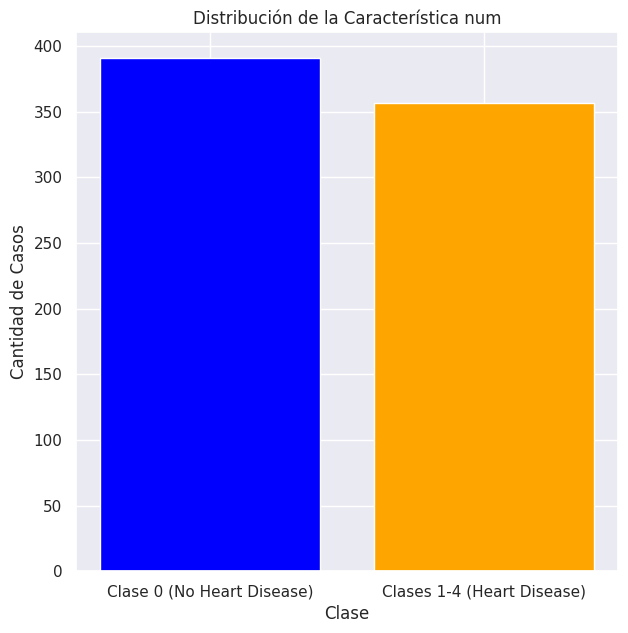

In [ ]:
# Contar las instancias de la columna 'num'
conteo_num = df4['num'].value_counts()

# Definir las categorías: clase 0 y la suma de clases 1, 2, 3, 4
valores = [conteo_num[0], conteo_num[1] + conteo_num[2] + conteo_num[3] + conteo_num[4]]
etiquetas = ['Clase 0 (No Heart Disease)', 'Clases 1-4 (Heart Disease)']

# Crear el gráfico de barras
plt.bar(etiquetas, valores, color=['blue', 'orange'])

# Añadir etiquetas y título
plt.xlabel('Clase')
plt.ylabel('Cantidad de Casos')
plt.title('Distribución de la Característica num')

# Mostrar el gráfico
plt.show()

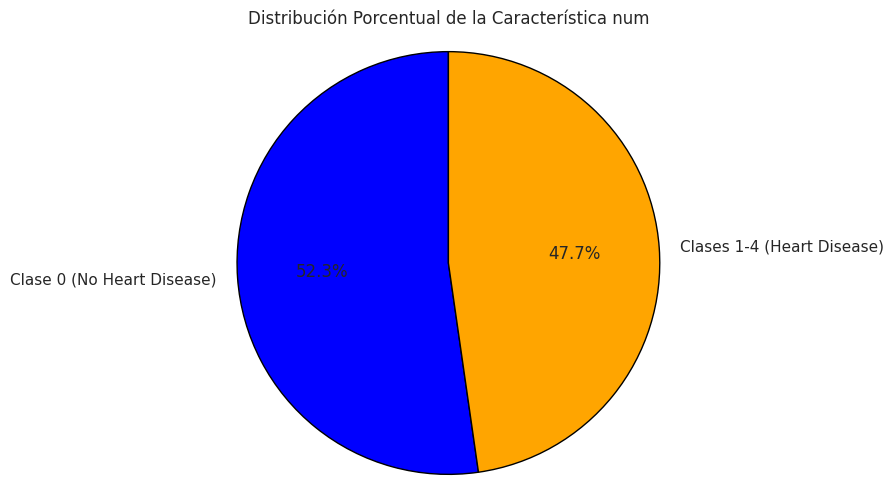

In [ ]:

# Definir los valores (número de casos de la clase 0 y la suma de clases 1-4)
valores = [conteo_num[0], conteo_num[1] + conteo_num[2] + conteo_num[3] + conteo_num[4]]
etiquetas = ['Clase 0 (No Heart Disease)', 'Clases 1-4 (Heart Disease)']

# Definir los colores para cada porción
colores = ['blue', 'orange']

# Crear el gráfico circular
plt.figure(figsize=(6, 6))
plt.pie(valores, labels=etiquetas, colors=colores, autopct='%1.1f%%', startangle=90, wedgeprops={'edgecolor': 'black'})

# Asegurar que el gráfico sea circular
plt.axis('equal')

# Título del gráfico
plt.title('Distribución Porcentual de la Característica num')

# Mostrar el gráfico
plt.show()

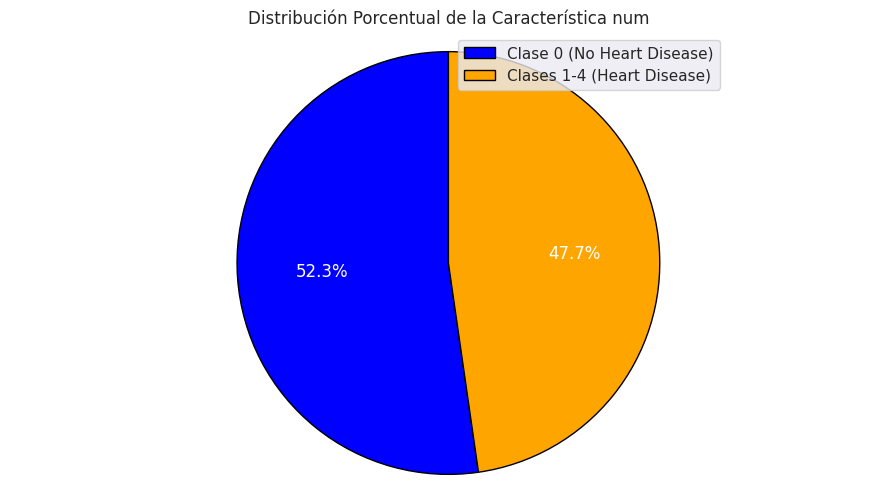

In [ ]:
# Definir los valores (número de casos de la clase 0 y la suma de clases 1-4)
valores = [conteo_num[0], conteo_num[1] + conteo_num[2] + conteo_num[3] + conteo_num[4]]
etiquetas = ['Clase 0 (No Heart Disease)', 'Clases 1-4 (Heart Disease)']

# Definir los colores para cada porción
colores = ['blue', 'orange']

# Crear el gráfico circular
plt.figure(figsize=(6, 6))
wedges, texts, autotexts = plt.pie(valores, labels=etiquetas, colors=colores, autopct='%1.1f%%',
                                   startangle=90, wedgeprops={'edgecolor': 'black'})


plt.axis('equal')
for text in texts + autotexts:
    text.set_color('white')
plt.legend(wedges, etiquetas, loc="upper right", bbox_to_anchor=(1.1, 1))
plt.title('Distribución Porcentual de la Característica num')

# Mostrar el gráfico
plt.show()

In [ ]:
# Crear la nueva columna 'target'
df4['target'] = df4['num'].apply(lambda x: 0 if x == 0 else 1)

# Verificar los primeros registros de la nueva columna
print(df4[['num', 'target']].head())

   num  target
0    0       0
1    2       1
2    1       1
3    0       0
4    0       0


In [ ]:
# Contar las instancias de la columna 'num'
conteo_num = df4['target'].value_counts()
print(conteo_num)

target
0    391
1    357
Name: count, dtype: int64


**Correlaiones con nueva caracteristica "target"**

In [ ]:
# Calcular la matriz de correlaciones para el DataFrame df4
matriz_correlaciones = df4.corr()

# Correlación de las variables con la target 'target'
# Aquí obtenemos directamente las correlaciones con 'target', sin necesidad de usar índices
correlaciones_target = matriz_correlaciones['target'].values[:-1]  # Excluir la última que sería 'target' en sí misma

# Obtener los índices de las correlaciones ordenados de mayor a menor en valor absoluto
indices_inversos = abs(correlaciones_target).argsort()[::-1]

# Crear un diccionario para almacenar las correlaciones con la target 'target'
diccionario = {}
# Aquí utilizamos X como el DataFrame sin la columna 'target'
X = df4.drop(columns=['target'])  # Excluimos 'target' para no calcular su correlación consigo misma
for nombre, correlacion in zip(X.columns[indices_inversos], list(correlaciones_target[indices_inversos])):
    diccionario[nombre] = correlacion

# Mostrar el resultado como DataFrame
resultado = pd.DataFrame.from_dict(diccionario, orient='index', columns=['Correlación con la target'])
print(resultado)

           Correlación con la target
num                         0.792644
exang                       0.482860
cp                          0.463405
oldpeak                     0.454458
thalch                     -0.353850
age                         0.299401
sex                         0.294758
age_range                   0.281230
id                          0.278671
thal                        0.264463
ca                          0.241381
slope                      -0.239280
trestbps                    0.160526
fbs                         0.150489
restecg                     0.135910
chol                        0.119271
Col_range                   0.117590


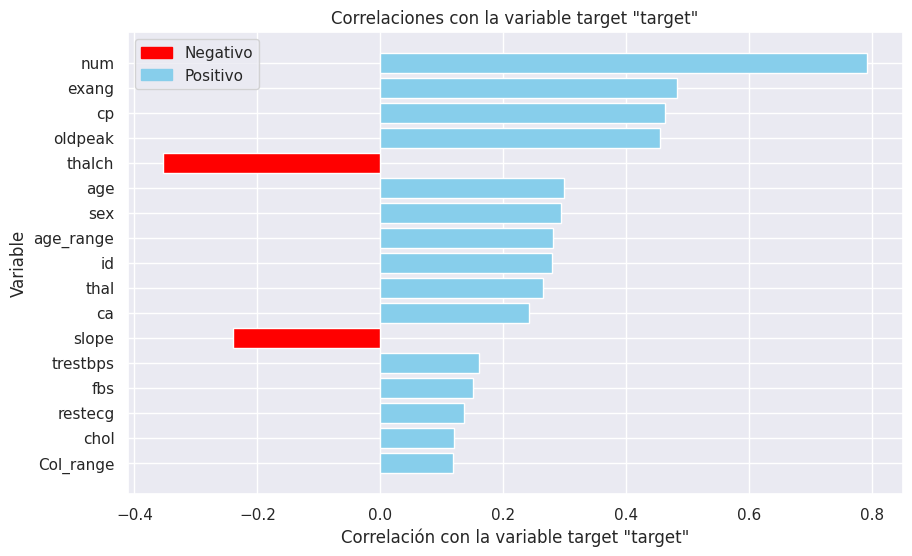

In [ ]:
# Definir los datos para el gráfico de barras
nombres_columnas = list(diccionario.keys())
correlaciones = list(diccionario.values())

# Crear el gráfico de barras
plt.figure(figsize=(10, 6))
# Usar 'red' para las correlaciones negativas y 'skyblue' para las positivas
colors = ['red' if c < 0 else 'skyblue' for c in correlaciones]
bars = plt.barh(nombres_columnas, correlaciones, color=colors)

# Etiquetas de los ejes
plt.xlabel('Correlación con la variable target "target"')
plt.ylabel('Variable')
plt.title('Correlaciones con la variable target "target"')

# Invertir el eje y para mostrar la variable más correlacionada en la parte superior
plt.gca().invert_yaxis()

# Crear los parches para la leyenda, uno para rojo (correlaciones negativas) y otro para azul claro (correlaciones positivas)
import matplotlib.patches as mpatches
red_patch = mpatches.Patch(color='red', label='Negativo')
blue_patch = mpatches.Patch(color='skyblue', label='Positivo')
plt.legend(handles=[red_patch, blue_patch])

# Mostrar el gráfico
plt.show()

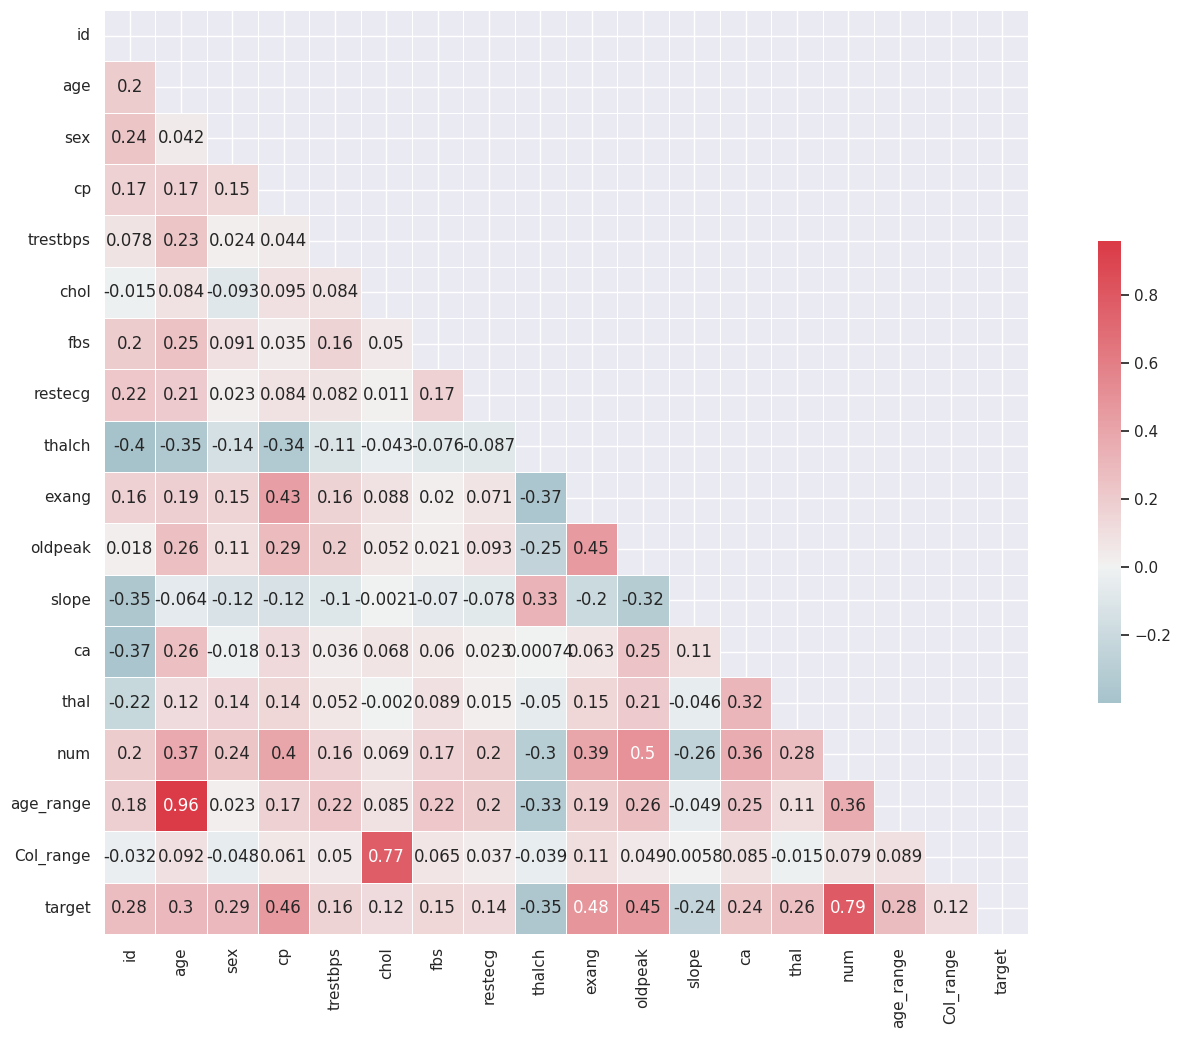

In [ ]:
# Calcular la matriz de correlación
corr = df4.corr()

# Crear la máscara
mask = np.zeros_like(corr, dtype=bool)  # Cambiar np.bool a bool
mask[np.triu_indices_from(mask)] = True

# Configurar el gráfico
f, ax = plt.subplots(figsize=(18, 12))
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Graficar el mapa de calor
sns.heatmap(corr, mask=mask, cmap=cmap, center=0, square=True, linewidths=.5, cbar_kws={'shrink': .5}, annot=True)
plt.show()

### **Modelado feauring Target :  booleano 1 y 0**

Se excluye num en vista que podria generar un sobre ajuste en los resultados, en vista que target se origina de los valores de 'num'.

Se procede a probar el resultado de los modelos una vez que se han consolidado los valores en una caracteristica del tipo booleana.

In [ ]:
# Definir las variables predictoras excluyendo 'target' y 'num'
X = df4.drop(columns=['target', 'num'])

# Definir la columna 'target' como la variable objetivo
Y = df4['target']

In [ ]:
# Estandarizar las características
obj_escalar = StandardScaler()
X_estandarizado = obj_escalar.fit_transform(X)

In [ ]:
# División de los datos en conjunto de entrenamiento y prueba
X_train, X_test, Y_train, Y_test = train_test_split(X_estandarizado, Y, test_size=0.2, random_state=0)

In [ ]:
# Lista de modelos
models = []
models.append(('LR', LogisticRegression(solver='liblinear', multi_class='ovr')))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVC', SVC()))

# Inicializar resultados y nombres
resultados = []
names = []

# Evaluar los modelos
for name, model in models:
    kfold = StratifiedKFold(n_splits=10, random_state=1, shuffle=True)
    cv_resultados = cross_val_score(model, X_train, Y_train, cv=kfold, scoring='accuracy')
    resultados.append(cv_resultados)
    names.append(name)
    print('%s: Accuracy = %f (Std = %f)' % (name, cv_resultados.mean(), cv_resultados.std()))

# Inicializar nombres y resultados de accuracy
names = []
accuracies = []

# Evaluar los modelos
for name, model in models:
    kfold = StratifiedKFold(n_splits=10, random_state=1, shuffle=True)
    cv_resultados = cross_val_score(model, X_train, Y_train, cv=kfold, scoring='accuracy')
    accuracies.append(cv_resultados.mean())
    names.append(name)

# Crear un DataFrame para mostrar los resultados de accuracy
accuracies_test3 = pd.DataFrame(accuracies, columns=['Accuracy_Test3'], index=names)

# Mostrar la tabla de resultados de accuracy
# se almacena el resultado para realizar un acomparacion con las diferentes corridas y pruebas
print(accuracies_test3)

LR: Accuracy = 0.824492 (Std = 0.046455)
LDA: Accuracy = 0.831215 (Std = 0.051061)
KNN: Accuracy = 0.831158 (Std = 0.027046)
CART: Accuracy = 0.797768 (Std = 0.036359)
NB: Accuracy = 0.817740 (Std = 0.055654)
SVC: Accuracy = 0.847881 (Std = 0.042925)
      Accuracy_Test3
LR          0.824492
LDA         0.831215
KNN         0.831158
CART        0.794379
NB          0.817740
SVC         0.847881


Se denota una mejora considerable en comparacion a los primeros calculos realizados.

In [ ]:
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix, accuracy_score, classification_report
import matplotlib.pyplot as plt

# Definir la característica target y las variables predictoras
X = df4.drop(columns=['target'])  # Excluir la columna target
Y = df4['target']  # Definir la columna target como la variable objetivo

# Estandarizar las características
obj_escalar = StandardScaler()
X_estandarizado = obj_escalar.fit_transform(X)

# División de los datos en conjunto de entrenamiento y prueba
X_train, X_test, Y_train, Y_test = train_test_split(X_estandarizado, Y, test_size=0.2, random_state=0)

# Definir y entrenar los modelos
lda_model = LinearDiscriminantAnalysis()
knn_model = KNeighborsClassifier()
svc_model = SVC()

In [ ]:
# Entrenar los modelos
lda_model.fit(X_train, Y_train)
knn_model.fit(X_train, Y_train)
svc_model.fit(X_train, Y_train)  # Entrenar SVC

# Realizar las predicciones con los tres modelos
y_pred_lda = lda_model.predict(X_test)
y_pred_knn = knn_model.predict(X_test)
y_pred_svc = svc_model.predict(X_test)  # Predicción con SVC

# Matriz de confusión y reporte de clasificación para LDA
print("Resultados de LDA:")
cm_lda = confusion_matrix(Y_test, y_pred_lda)
ac_lda = accuracy_score(Y_test, y_pred_lda)
print(f"Precisión de LDA: {ac_lda:.4f}")
print("Matriz de Confusión (LDA):\n", cm_lda)
print("\nReporte de Clasificación (LDA):\n", classification_report(Y_test, y_pred_lda))


Resultados de LDA:
Precisión de LDA: 0.9000
Matriz de Confusión (LDA):
 [[64  2]
 [13 71]]

Reporte de Clasificación (LDA):
               precision    recall  f1-score   support

           0       0.83      0.97      0.90        66
           1       0.97      0.85      0.90        84

    accuracy                           0.90       150
   macro avg       0.90      0.91      0.90       150
weighted avg       0.91      0.90      0.90       150



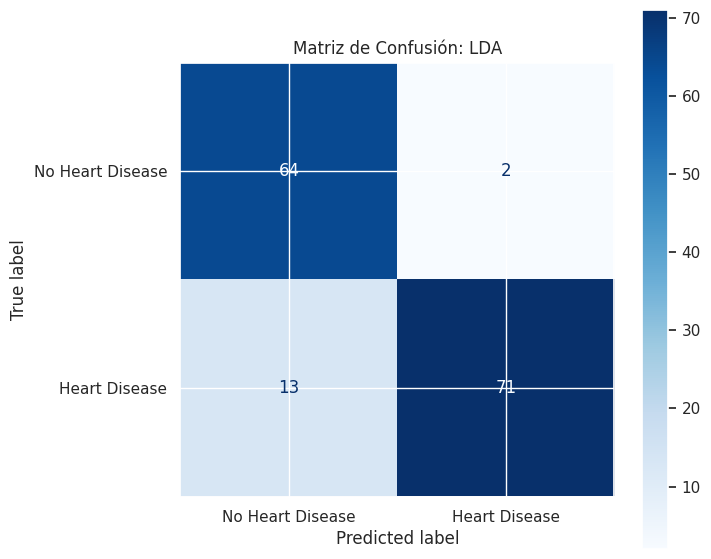

In [ ]:
# Gráfico de la matriz de confusión para LDA usando ConfusionMatrixDisplay
disp_lda = ConfusionMatrixDisplay(confusion_matrix=cm_lda, display_labels=["No Heart Disease", "Heart Disease"])
disp_lda.plot(cmap=plt.cm.Blues)
plt.title("Matriz de Confusión: LDA")
plt.show()

El modelo LDA muestra un buen equilibrio entre la clasificación correcta de personas con y sin la enfermedad.

El bajo número de falsos positivos es un indicador positivo, ya que evita etiquetar erróneamente a personas sanas como enfermas.

Por otra parte, el número de falsos negativos (13) debe ser monitoreado, ya que el modelo está fallando en algunos casos críticos al no detectar la enfermedad.

In [ ]:
# Matriz de confusión y reporte de clasificación para KNN
print("Resultados de KNN:")
cm_knn = confusion_matrix(Y_test, y_pred_knn)
ac_knn = accuracy_score(Y_test, y_pred_knn)
print(f"Precisión de KNN: {ac_knn:.4f}")
print("Matriz de Confusión (KNN):\n", cm_knn)
print("\nReporte de Clasificación (KNN):\n", classification_report(Y_test, y_pred_knn))

Resultados de KNN:
Precisión de KNN: 0.8667
Matriz de Confusión (KNN):
 [[60  6]
 [14 70]]

Reporte de Clasificación (KNN):
               precision    recall  f1-score   support

           0       0.81      0.91      0.86        66
           1       0.92      0.83      0.88        84

    accuracy                           0.87       150
   macro avg       0.87      0.87      0.87       150
weighted avg       0.87      0.87      0.87       150



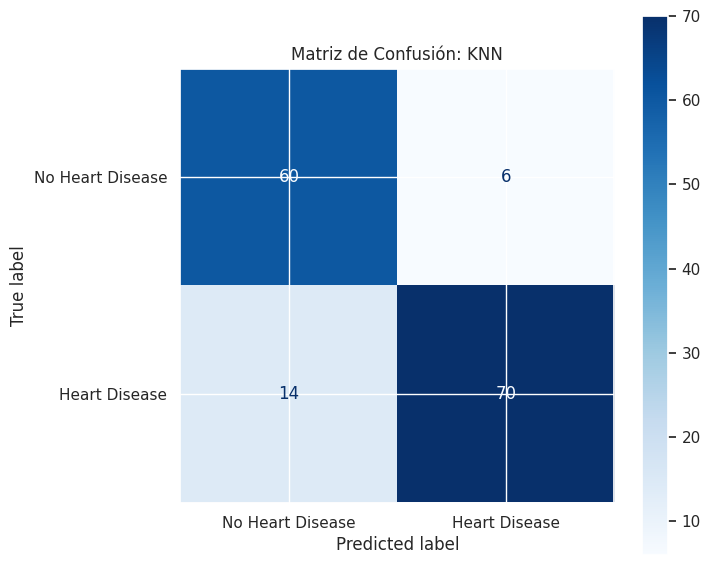

In [ ]:
# Gráfico de la matriz de confusión para KNN usando ConfusionMatrixDisplay
disp_knn = ConfusionMatrixDisplay(confusion_matrix=cm_knn, display_labels=["No Heart Disease", "Heart Disease"])
disp_knn.plot(cmap=plt.cm.Blues)
plt.title("Matriz de Confusión: KNN")
plt.show()


* Hay 70 casos correctamente predichos como "Heart Disease", lo que demuestra que el modelo es efectivo al identificar a los pacientes con la enfermedad.

* El modelo logra clasificar de forma correcta 60 casos como "No Heart Disease". Esto indica que el modelo tiene una buena capacidad para identificar correctamente a las personas sin la enfermedad cardíaca.

In [ ]:
# Matriz de confusión y reporte de clasificación para SVC
print("Resultados de SVC:")
cm_svc = confusion_matrix(Y_test, y_pred_svc)
ac_svc = accuracy_score(Y_test, y_pred_svc)
print(f"Precisión de SVC: {ac_svc:.4f}")
print("Matriz de Confusión (SVC):\n", cm_svc)
print("\nReporte de Clasificación (SVC):\n", classification_report(Y_test, y_pred_svc))

Resultados de SVC:
Precisión de SVC: 0.9867
Matriz de Confusión (SVC):
 [[66  0]
 [ 2 82]]

Reporte de Clasificación (SVC):
               precision    recall  f1-score   support

           0       0.97      1.00      0.99        66
           1       1.00      0.98      0.99        84

    accuracy                           0.99       150
   macro avg       0.99      0.99      0.99       150
weighted avg       0.99      0.99      0.99       150



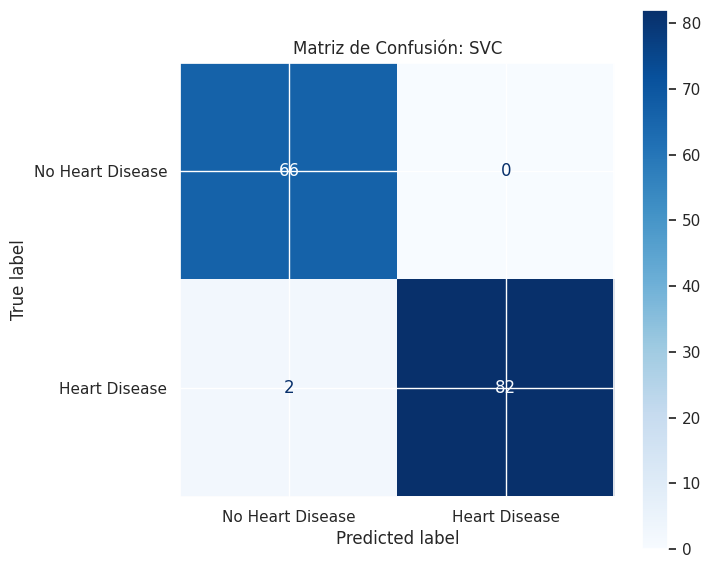

In [ ]:
# Gráfico de la matriz de confusión para SVC usando ConfusionMatrixDisplay
disp_svc = ConfusionMatrixDisplay(confusion_matrix=cm_svc, display_labels=["No Heart Disease", "Heart Disease"])
disp_svc.plot(cmap=plt.cm.Blues)
plt.title("Matriz de Confusión: SVC")
plt.show()

#### **Matriz de Confusión SVC**
**Resultado satisfactorio**
El modelo predice correctamente 82 casos de "Heart Disease". Esto sugiere que el modelo SVC es muy eficaz en la identificación de personas con enfermedad cardíaca, ya que el número de verdaderos positivos es alto.

El modelo SVC ha demostrado ser el más efectivo en este caso, con una combinación óptima de alta precisión, cero falsos positivos y un mínimo número de falsos negativos. Este balance hace que SVC sea una excelente opción para este problema de clasificación médica.

## Redes Neuronales sobre Target

**Sobre la nueva caracteristica Target Clase 0 (No Heart Disease)  Clase  (Heart Disease)**

*modelo de redes neuronales*

In [ ]:
# Definir las variables predictoras excluyendo 'target' y 'num'
X = df4.drop(columns=['target', 'num'])

# Definir la columna 'target' como la variable objetivo
Y = df4['target']

In [ ]:
# División de los datos en conjunto de entrenamiento y prueba
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

In [ ]:
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
# Inicializar el modelo
ann_model = MLPClassifier(hidden_layer_sizes=(100,), max_iter=500, activation='relu', solver='adam', random_state=1)
# Inicializar el modelo
ann_model.fit(X_train_scaled, Y_train)

# Entrenar el modelo con los datos
ann_model.fit(X_train, Y_train)

MLPClassifier(max_iter=500, random_state=1)

**Evaluar el modelo**



In [ ]:
accuracy_ann = ann_model.score(X_test_scaled, Y_test)

print("Accuracy del modelo de redes neuronales (ANN): ", accuracy_ann)


Accuracy del modelo de redes neuronales (ANN):  0.7533333333333333


In [ ]:
# Definir la red neuronal (ANN) con un espacio de búsqueda reducido
param_grid = {
    'hidden_layer_sizes': [(50,), (100,)],  # Menos configuraciones para capas ocultas
    'activation': ['relu'],  # Solo 'relu'
    'solver': ['adam'],  # Solo el optimizador 'adam'
    'alpha': [0.0001, 0.001],  # Menos valores de regularización
    'learning_rate': ['constant'],  # Solo tasa de aprendizaje constante
    'max_iter': [500]  # Reducir el número de iteraciones
}

# Inicializar el modelo de ANN
mlp = MLPClassifier(random_state=42)

# Utilizar GridSearchCV para encontrar los mejores hiperparámetros
grid_search = GridSearchCV(mlp, param_grid, cv=5, scoring='accuracy', verbose=3, n_jobs=-1)
grid_search.fit(X_train, Y_train)

# Mostrar los mejores hiperparámetros encontrados
print("Mejores hiperparámetros encontrados:")
print(grid_search.best_params_)

Fitting 5 folds for each of 4 candidates, totalling 20 fits
Mejores hiperparámetros encontrados:
{'activation': 'relu', 'alpha': 0.0001, 'hidden_layer_sizes': (50,), 'learning_rate': 'constant', 'max_iter': 500, 'solver': 'adam'}


In [ ]:
# Entrenar el modelo con los mejores hiperparámetros
mejor_ann = grid_search.best_estimator_

# Evaluar el modelo con los datos de prueba
accuracy_ann_opt = mejor_ann.score(X_test, Y_test)
print(f"Accuracy del mejor modelo ANN con GridSearchCV: {accuracy_ann_opt:.4f}")

Accuracy del mejor modelo ANN con GridSearchCV: 0.8267


In [ ]:
# Crear un DataFrame con el resultado de la red neuronal
df_ann = pd.DataFrame({'Accuracy_Test3': [accuracy_ann_opt]}, index=['ANN'])

# Concatenar el DataFrame de la red neuronal con accuracies_test1
accuracies_test3 = pd.concat([accuracies_test3, df_ann])

# Mostrar la tabla con los resultados actualizados
print(accuracies_test3)

      Accuracy_Test3
LR          0.824492
LDA         0.831215
KNN         0.831158
CART        0.794379
NB          0.817740
SVC         0.847881
ANN         0.826667


**Matriz de Confusion Redes Neuronales**

Accuracy del modelo ANN: 0.8267
Matriz de Confusión (ANN):
 [[57  9]
 [17 67]]

Reporte de Clasificación (ANN):
               precision    recall  f1-score   support

           0       0.77      0.86      0.81        66
           1       0.88      0.80      0.84        84

    accuracy                           0.83       150
   macro avg       0.83      0.83      0.83       150
weighted avg       0.83      0.83      0.83       150



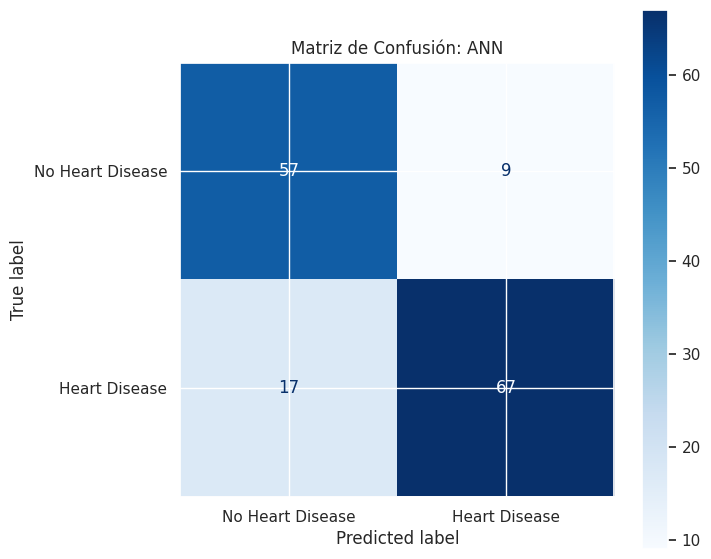

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix, accuracy_score, classification_report
import matplotlib.pyplot as plt

# Realizar las predicciones en el conjunto de prueba con el mejor modelo ANN
y_pred_ann = grid_search.best_estimator_.predict(X_test)

# Calcular la matriz de confusión
cm_ann = confusion_matrix(Y_test, y_pred_ann)
ac_ann = accuracy_score(Y_test, y_pred_ann)

# Mostrar la precisión del modelo ANN
print(f"Accuracy del modelo ANN: {ac_ann:.4f}")

# Mostrar la matriz de confusión
print("Matriz de Confusión (ANN):\n", cm_ann)

# Mostrar el reporte de clasificación
print("\nReporte de Clasificación (ANN):\n", classification_report(Y_test, y_pred_ann))

# Gráfico de la matriz de confusión
disp_ann = ConfusionMatrixDisplay(confusion_matrix=cm_ann, display_labels=["No Heart Disease", "Heart Disease"])
disp_ann.plot(cmap=plt.cm.Blues)
plt.title("Matriz de Confusión: ANN")
plt.show()

Un resultado satisfactorio, a mejorado con los ultimo ajustes aplicados.

- El modelo ha clasificado correctamente 57 casos como "No Heart Disease"

-  clasificado incorrectamente 9 casos de "No Heart Disease" como "Heart Disease", lo que indica falsos positivos

- Ha clasificado correctamente 67 casos como "Heart Disease".

In [ ]:
from sklearn import metrics
import matplotlib.pyplot as plt
import numpy as np

# Obtener las probabilidades predichas por el mejor modelo (ANN)
y_test_pred_prob = grid_search.best_estimator_.predict_proba(X_test)

# Extraer las probabilidades de la clase positiva (Heart Disease)
y_test_pred_prob_pos = y_test_pred_prob[np.where(Y_test == 1)[0]]
y_test_pred_prob_neg = y_test_pred_prob[np.where(Y_test == 0)[0]]

In [ ]:
# Obtener las predicciones para calcular el ROC AUC
preds = y_test_pred_prob[:, 1]  # Probabilidades de la clase positiva (Heart Disease)

# Calcular la curva ROC y el AUC
fpr, tpr, threshold = metrics.roc_curve(Y_test, preds)
roc_auc = metrics.auc(fpr, tpr)

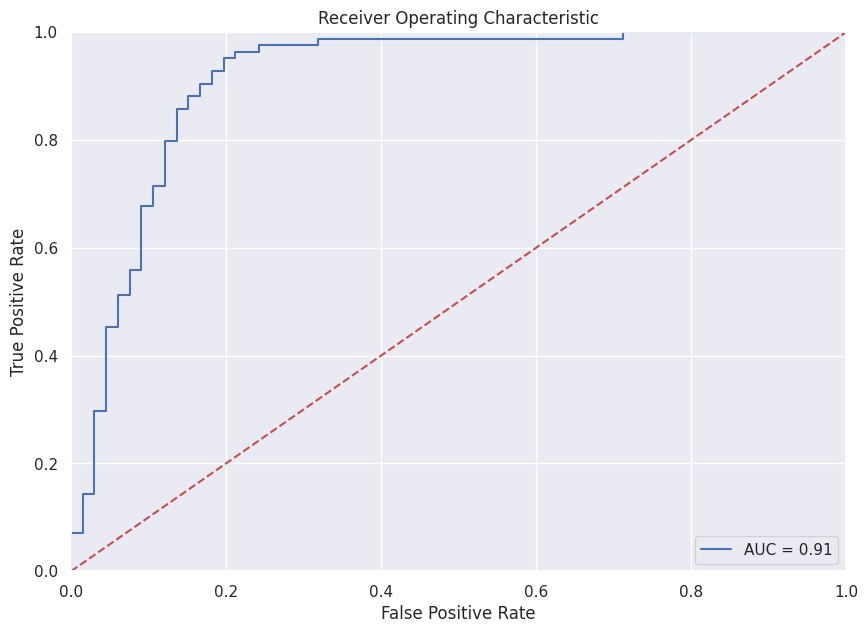

In [ ]:
# Graficar la curva ROC
plt.figure(figsize=(10, 7))
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label='AUC = %0.2f' % roc_auc)
plt.legend(loc='lower right')
plt.plot([0, 1], [0, 1], 'r--')  # Línea diagonal
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [ ]:
# Umbralizar las predicciones con un umbral de 0.5
umbral = 0.5
y_umbralizadas = 1 * (y_test_pred_prob[:, 1] > umbral)

In [ ]:
# Imprimir algunas métricas de rendimiento después de la umbralización
print("\nReporte de Clasificación con umbral 0.5:")
print(metrics.classification_report(Y_test, y_umbralizadas))


Reporte de Clasificación con umbral 0.5:
              precision    recall  f1-score   support

           0       0.77      0.86      0.81        66
           1       0.88      0.80      0.84        84

    accuracy                           0.83       150
   macro avg       0.83      0.83      0.83       150
weighted avg       0.83      0.83      0.83       150



In [ ]:
from sklearn import metrics

# Umbralizar las predicciones con un umbral de 0.5 (o el que decidas)
umbral = 0.5
y_umbralizadas = 1 * (y_test_pred_prob[:, 1] > umbral)

# Imprimir la matriz de confusión
print(u"Matriz de confusión\n", metrics.confusion_matrix(Y_test, y_umbralizadas))

# Imprimir métricas de rendimiento
print("\nAccuracy\t{}".format(round(metrics.accuracy_score(Y_test, y_umbralizadas), 2)))
print("Sensitividad (Recall)\t{}".format(round(metrics.recall_score(Y_test, y_umbralizadas), 2)))
print(u"Precisión\t{}".format(round(metrics.precision_score(Y_test, y_umbralizadas), 2)))

Matriz de confusión
 [[57  9]
 [17 67]]

Accuracy	0.83
Sensitividad (Recall)	0.8
Precisión	0.88


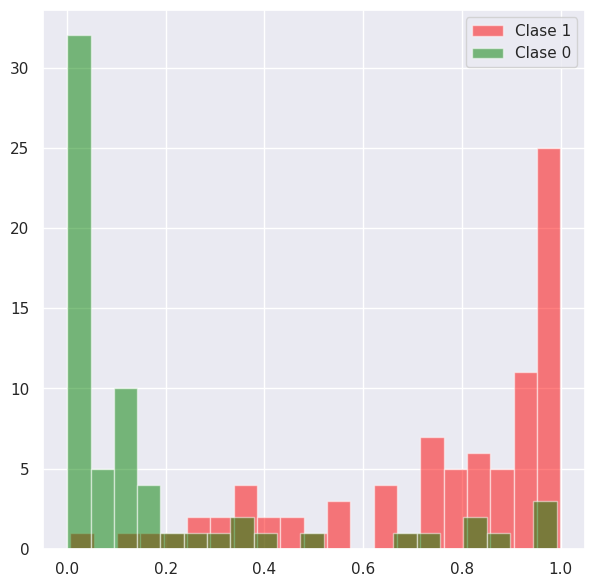

In [ ]:
represento_doble_hist(y_test_pred_prob_pos[:, 1], y_test_pred_prob_neg[:, 1], n_bins=21)

### **Resumen de Resultados de los Modelos**

**Resultados de Modelos Aplicados bajo tecnicas de Ensemble Method **

In [ ]:
print("Accuracy del modelo ensemble: ", accuracy_ensemble)

Accuracy del modelo ensemble:  0.5533333333333333


**Resultados de Modelos Aplicados bajo tecnicas de Undersampling**

In [ ]:
print(f'Accuracy Logistic Regression (Undersampling): {accuracy_lr:.4f}')
print(f'Accuracy Random Forest (Undersampling): {accuracy_rf:.4f}')

Accuracy Logistic Regression (Undersampling): 0.5333
Accuracy Random Forest (Undersampling): 0.5533


**Resumen de Pruebas de los Diferentes Modelos**

Se corrieron varias opciones sobre el conjunto de datos, una corrida de modleos inicialmente con resultados muy por debajo de un resultado aceptable, por lo que estos datos tenian un margen para ser mejorados.

Se corren y buscan opciones y posibilidades de mejora en hyoerparametros y feature Engeenering

El conjunto de mejores resultados se agrupan en la siguietne tabla, ademas se indica el intento de testing del mismo.

En lo que respecta al test3, corresponde cuando se aplica el feature engineering, creando la columna target a raiz de la caracteristica original num.

In [ ]:
# Concatenar los DataFrames por columnas
df_comparacion = pd.concat([accuracies_test1, accuracies_test2, accuracies_test3], axis=1)

# Mostrar la tabla resultante
print(df_comparacion)

      Accuracy_Test1  Accuracy_Test2  Accuracy_Test3
LR          0.640621        0.642232        0.824492
LDA         0.647316        0.640508        0.831215
KNN         0.618785        0.598729        0.831158
CART        0.555311        0.561921        0.794379
NB          0.618955        0.617090        0.817740
SVC         0.643983        0.640593        0.847881
ANN         0.573333        0.566667        0.826667


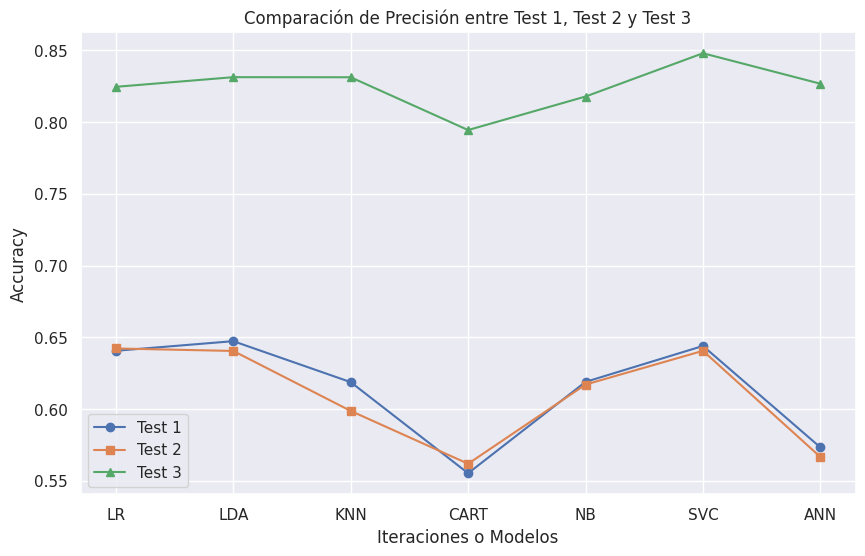

In [ ]:
df_comparacion = pd.concat([accuracies_test1, accuracies_test2, accuracies_test3], axis=1)

# Crear un gráfico de líneas para comparar los tres tests
plt.figure(figsize=(10, 6))
plt.plot(df_comparacion.index, df_comparacion['Accuracy_Test1'], marker='o', label='Test 1')
plt.plot(df_comparacion.index, df_comparacion['Accuracy_Test2'], marker='s', label='Test 2')
plt.plot(df_comparacion.index, df_comparacion['Accuracy_Test3'], marker='^', label='Test 3')

# Etiquetas y título
plt.title('Comparación de Precisión entre Test 1, Test 2 y Test 3')
plt.xlabel('Iteraciones o Modelos')
plt.ylabel('Accuracy')
plt.legend()

# Mostrar la gráfica
plt.grid(True)
plt.show()

**Grafico: Resultados de Modelos**

El gráfico comparativo muestra el rendimiento de varios modelos de machine learning en tres pruebas diferentes (Test 1, Test 2 y Test 3). Al principio, los resultados de Test 1 y Test 2 presentan rendimientos conservadores, con niveles de precisión (accuracy) que varían entre los modelos. Sin embargo, con la implementación de mejoras como el ajuste de hiperparámetros y técnicas de feature engineering, se observa una mejora notable en los resultados de Test 3, especialmente en modelos como Logistic Regression (LR), SVC y ANN.

El comportamiento de los modelos refleja una evolución en su capacidad predictiva. Modelos como ANN muestran una curva ascendente significativa, lo que sugiere que los ajustes realizados fueron particularmente efectivos en este modelo. Por otro lado, modelos como KNN y CART presentan una mejora más gradual, lo que podría indicar que estos modelos requieren ajustes más específicos para alcanzar rendimientos superiores.

La visualización de las tres pruebas permite identificar fácilmente las diferencias entre los modelos y cómo sus resultados mejoran o se mantienen consistentes a lo largo de las iteraciones. Esta gráfica, junto con los resultados de la tabla de precisión, subraya la importancia de los ajustes y las pruebas múltiples para obtener modelos más robustos y precisos.

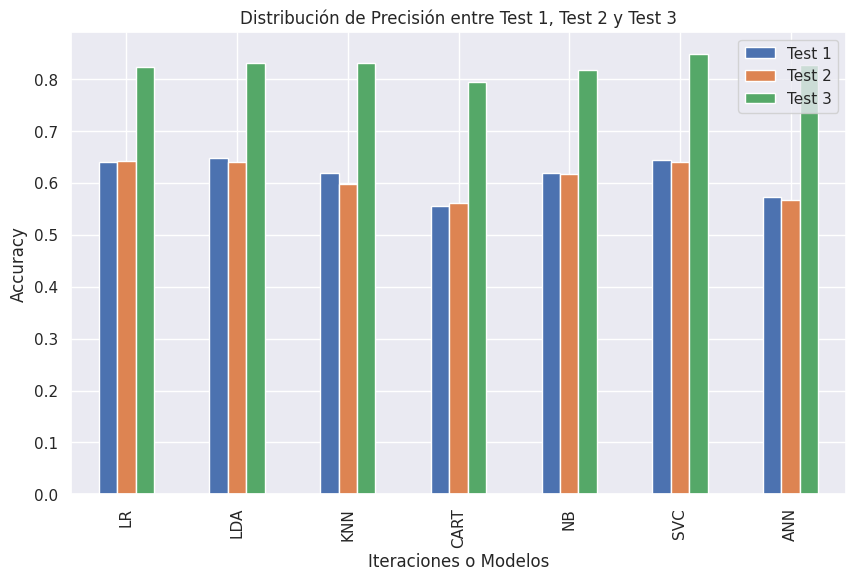

In [ ]:
# Crear un histograma (barras agrupadas)
df_comparacion.plot(kind='bar', figsize=(10, 6))

# Etiquetas y título
plt.title('Distribución de Precisión entre Test 1, Test 2 y Test 3')
plt.xlabel('Iteraciones o Modelos')
plt.ylabel('Accuracy')
plt.legend(['Test 1', 'Test 2', 'Test 3'])

# Mostrar la gráfica
plt.grid(True)
plt.show()

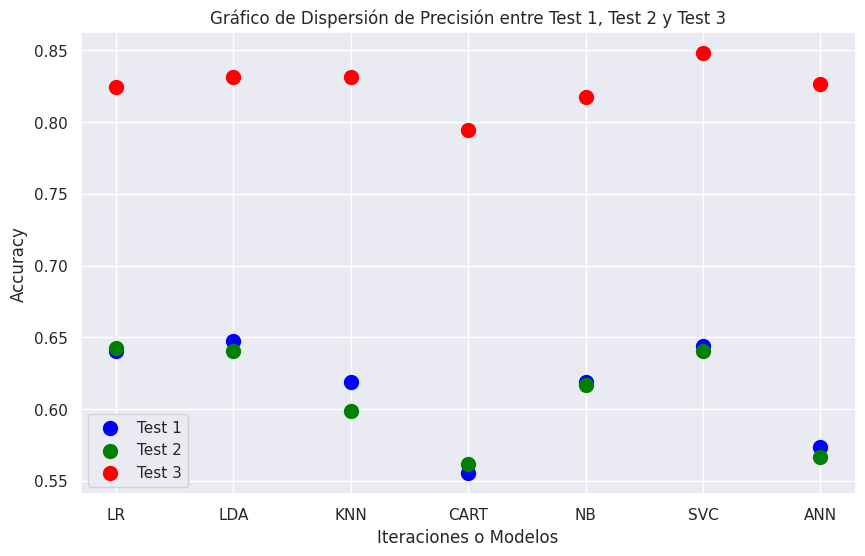

In [ ]:
# Crear un gráfico de dispersión para comparar las precisiones
plt.figure(figsize=(10, 6))
plt.scatter(df_comparacion.index, df_comparacion['Accuracy_Test1'], color='blue', label='Test 1', s=100)
plt.scatter(df_comparacion.index, df_comparacion['Accuracy_Test2'], color='green', label='Test 2', s=100)
plt.scatter(df_comparacion.index, df_comparacion['Accuracy_Test3'], color='red', label='Test 3', s=100)

# Etiquetas y título
plt.title('Gráfico de Dispersión de Precisión entre Test 1, Test 2 y Test 3')
plt.xlabel('Iteraciones o Modelos')
plt.ylabel('Accuracy')
plt.legend()

# Mostrar la gráfica
plt.grid(True)
plt.show()

## Puesta en Prueba del Modelo Final

In [ ]:
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix, accuracy_score, classification_report
import matplotlib.pyplot as plt

# Definir la característica target y las variables predictoras
# Eliminar las columnas 'target' y 'num' del conjunto de datos
X = df4.drop(columns=['target', 'num'])  # Excluir 'target' y 'num'
Y = df4['target']  # Definir la columna target como la variable objetivo

# Estandarizar las características
obj_escalar = StandardScaler()
X_estandarizado = obj_escalar.fit_transform(X)

# División de los datos en conjunto de entrenamiento y prueba
X_train, X_test, Y_train, Y_test = train_test_split(X_estandarizado, Y, test_size=0.2, random_state=0)

# Crear el modelo SVC
modelo_final = SVC()

# Entrenar el modelo con el conjunto de entrenamiento
modelo_final.fit(X_train, Y_train)

# Realizar las predicciones con el modelo SVC
y_pred_svc = modelo_final.predict(X_test)

# Evaluar el modelo en el conjunto de prueba
score = modelo_final.score(X_test, Y_test)
print(f"Exactitud del modelo SVC: {score}")

# Matriz de confusión y reporte de clasificación para SVC
print("Resultados de SVC:")
cm_svc = confusion_matrix(Y_test, y_pred_svc)
ac_svc = accuracy_score(Y_test, y_pred_svc)
print(f"Precisión de SVC: {ac_svc:.4f}")
print("Matriz de Confusión (SVC):\n", cm_svc)
print("\nReporte de Clasificación (SVC):\n", classification_report(Y_test, y_pred_svc))

Exactitud del modelo SVC: 0.7866666666666666
Resultados de SVC:
Precisión de SVC: 0.7867
Matriz de Confusión (SVC):
 [[52 14]
 [18 66]]

Reporte de Clasificación (SVC):
               precision    recall  f1-score   support

           0       0.74      0.79      0.76        66
           1       0.82      0.79      0.80        84

    accuracy                           0.79       150
   macro avg       0.78      0.79      0.78       150
weighted avg       0.79      0.79      0.79       150



### **Crear el Modelo Final en un ejecutable**

In [ ]:
import joblib

# Guardar el modelo SVC entrenado en un archivo
joblib.dump(modelo_final, 'modelo_SVC_entrenado.pkl')

['modelo_SVC_entrenado.pkl']

**Llamar el Modelo Entrenado**

In [ ]:
heart_disease = df4.copy()

In [ ]:
heart_disease.columns

Index(['id', 'age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg',
       'thalch', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'num', 'age_range',
       'Col_range', 'target'],
      dtype='object')

In [ ]:
heart_disease = heart_disease.drop(columns=['num', 'target'])
heart_disease.columns

Index(['id', 'age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg',
       'thalch', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'age_range',
       'Col_range'],
      dtype='object')

In [ ]:
#cargar el modelo guardado posteriormente
modelo_cargado = joblib.load('modelo_SVC_entrenado.pkl')

In [ ]:
# Usar el modelo cargado para hacer predicciones
predicciones = modelo_cargado.predict(heart_disease)

In [ ]:
# Añadir las predicciones al DataFrame en una nueva columna llamada 'HeartDisease_Pred'
heart_disease['HeartDisease_Pred'] = predicciones

# Mostrar las primeras filas del DataFrame con las predicciones añadidas
heart_disease.head()

id  age  sex  cp  trestbps   chol  fbs  restecg  thalch  exang  oldpeak  \
0   1   63    1   0     145.0  233.0    1        1   150.0      0      2.3   
1   2   67    1   3     160.0  286.0    0        1   108.0      1      1.5   
2   3   67    1   3     120.0  229.0    0        1   129.0      1      2.6   
3   4   37    1   2     130.0  250.0    0        0   187.0      0      3.5   
4   5   41    0   1     130.0  204.0    0        1   172.0      0      1.4   

   slope   ca  thal  age_range  Col_range  HeartDisease_Pred  
0      0  0.0     2         60          1                  1  
1      1  3.0     0         60          2                  1  
2      1  2.0     1         60          1                  1  
3      0  0.0     0         30          2                  1  
4      2  0.0     0         40          1                  1

## **Conclusiones Generales**

Se he llegado a la conclusion de este proyecto de analisis de datos y Modelos de Aprendizaje Automatico.

El objetivo este estudio correspondía demostrar si por medio de la ML s epuede predecir el funcionanamiento erroneo o la probabilidad de sufrir una enfermedad.

Actualmente la IA y ML pueden ser utilizdos no solo para procedimientos preventivos, se puede estimar cuando una maquina puede fallar y cuando puede dar un fallo, por lo tanto el ser humano en una misma posibilidad.

Podemos predecir o pronosticar una probabilidad de daños o desarrollo de enfermedades.

**Datos Utilizados:** Los datos provienen de fuentes confiables como Kaggle y el repositorio de la UCI. Las variables incluyen información como la presión arterial, el colesterol, el tipo de dolor en el pecho y otras medidas relacionadas con la salud cardíaca.

**Análisis Exploratorio:** Se han utilizado diversas herramientas como matplotlib, seaborn, y plotly para visualizar los datos. Esto es crucial para identificar patrones y relaciones entre las variables.

**Modelos de Machine Learning:** Se han implementado varios modelos de Machine Learning para el análisis predictivo. Entre ellos, es probable que se haya comparado el rendimiento de modelos como Logistic Regression, Decision Trees, K-Nearest Neighbors, y más.

En resumen, este proyecto ha buscado proporcionar una herramienta que ayude a detectar y prever riesgos de enfermedades cardíacas, lo que podría tener un impacto significativo en el área de la salud preventiva.

Entiendo que este ejercico puede ser visto como un caso unicamente de formación academica, sin embargo si un estudiante de un programa de un Master en Data Science, puede usar un dataset y correr un ejercico como tal, si tomamos más recursos, mayor cantidad de **capacidad** analítica y captura de datos, se puede agregar el uso de los expedientes médicos digitales de los pacientes, pasar una mascara en las identificaciones y nombres para prevenir el daño de la privacidad de las personas, y utilizar esta información para crear y fomentar políticas de salud pñublica en función de la condición méidca de los ciudadanos.




####  **Referencias de codigo**


Se realizaron consultas de coigo, revisores automaticos, testeos de codigo.

**consulta de materiales :**

-Universidad IMF. Modulo de Modelos de aprendizaje automático. Universidad IMF. España

-Grow Up. Curso de análisis de datos: Modelos de aprendizaje automático de regresión y clasificación. Grow Up. Costa Rica

-Curso de Big data- Programa curso libre Universidad Veritas.  Costa Rica

"Cuestiona todo lo que te rodea. No aceptes lo que te enseñan ciegamente, sino que investiga por ti mismo y mantén siempre la curiosidad." — **Carl Sagan**

### **Resumen final del dataset**

In [ ]:
df.describe().T

count        mean         std   min     25%    50%     75%    max
id         748.0  407.774064  266.774247   1.0  187.75  374.5  561.25  920.0
age        748.0   52.883690    9.496063  28.0   46.00   54.0   59.00   77.0
sex        748.0    0.755348    0.430169   0.0    1.00    1.0    1.00    1.0
cp         748.0    2.161765    0.955101   0.0    1.00    2.0    3.00    3.0
trestbps   748.0  132.556150   17.226371  92.0  120.00  130.0  140.00  200.0
chol       748.0  245.877005   57.530397  85.0  211.00  236.0  275.00  603.0
fbs        748.0    0.163102    0.369706   0.0    0.00    0.0    0.00    1.0
restecg    748.0    0.572193    0.763194   0.0    0.00    0.0    1.00    2.0
thalch     748.0  141.029412   24.111614  69.0  125.00  140.0  160.00  202.0
exang      748.0    0.347594    0.476525   0.0    0.00    0.0    1.00    1.0
oldpeak    748.0    0.867647    1.063485   0.0    0.00    0.5    1.50    6.2
slope      748.0    1.161765    0.500905   0.0    1.00    1.0    1.00    2.0
ca         748.0    0.268717    0.677609   0.0    0.00    0.0    0.00    3.0
thal       748.0    0.283422    0.545045   0.0    0.00    0.0    0.00    2.0
num        748.0    0.834225    1.102173   0.0    0.00    0.0    1.00    4.0
age_range  748.0   48.275401    9.863545  20.0   40.00   50.0   50.00   70.0
Col_range  748.0    1.308824    0.745950   0.0    1.00    1.0    2.00    2.0
target     748.0    0.477273    0.499817   0.0    0.00    0.0    1.00    1.0

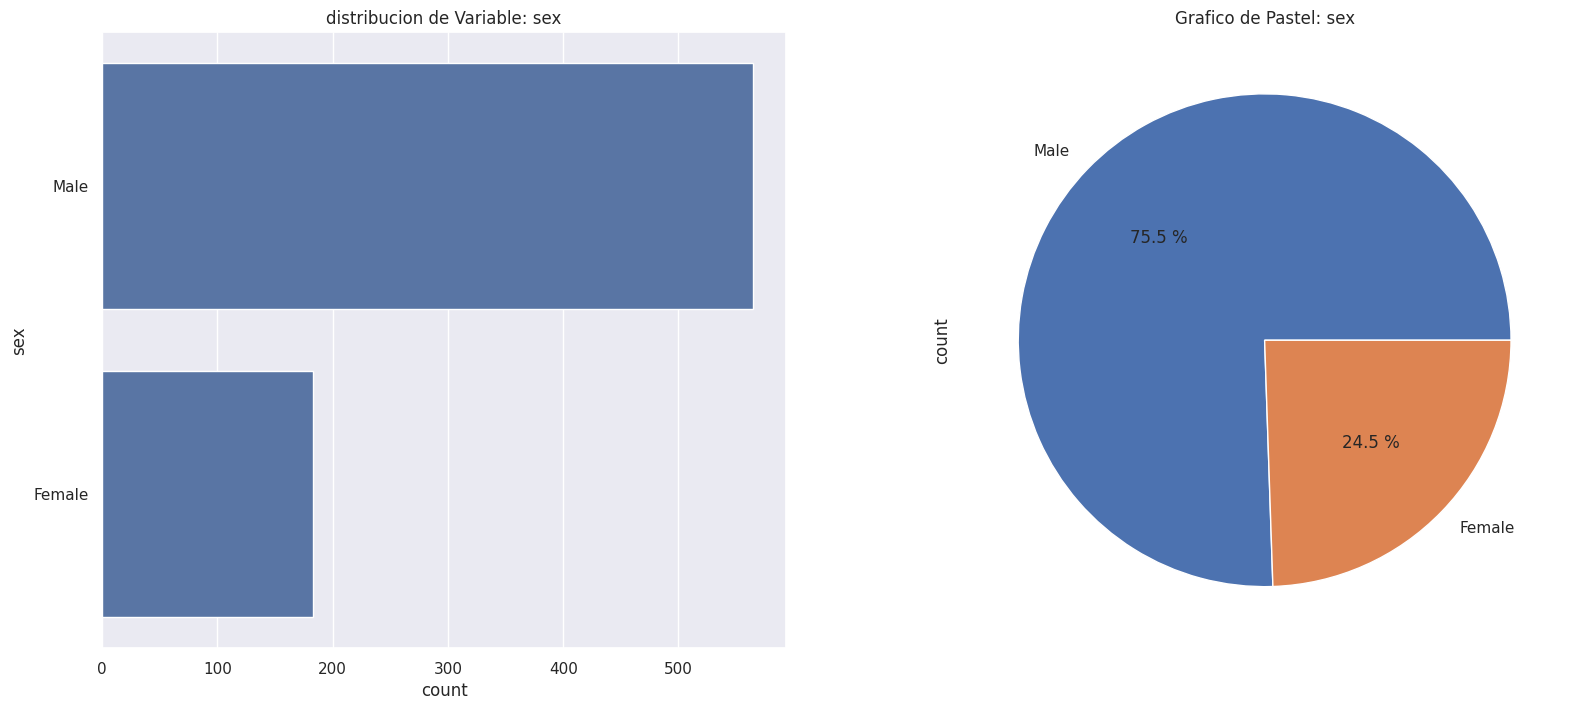

In [ ]:
explorarVariableCategorica(df,"sex")

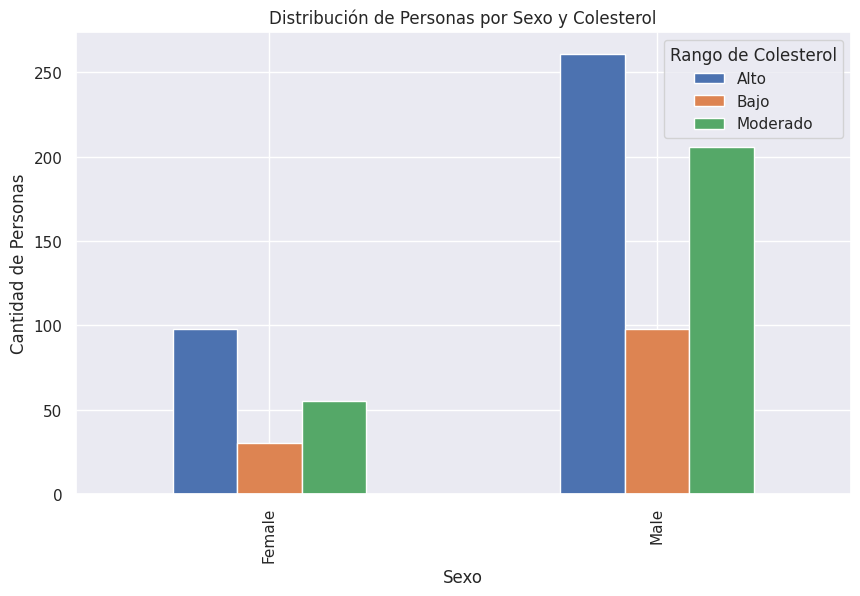

In [ ]:
graficos3 = pd.crosstab(df['sex'], df['Col_range'])

# Crear el gráfico de barras agrupado
graficos3.plot(kind='bar', figsize=(10, 6))

# Agregar título y etiquetas
plt.title('Distribución de Personas por Sexo y Colesterol')
plt.xlabel('Sexo')
plt.ylabel('Cantidad de Personas')
plt.legend(title='Rango de Colesterol')
plt.show()

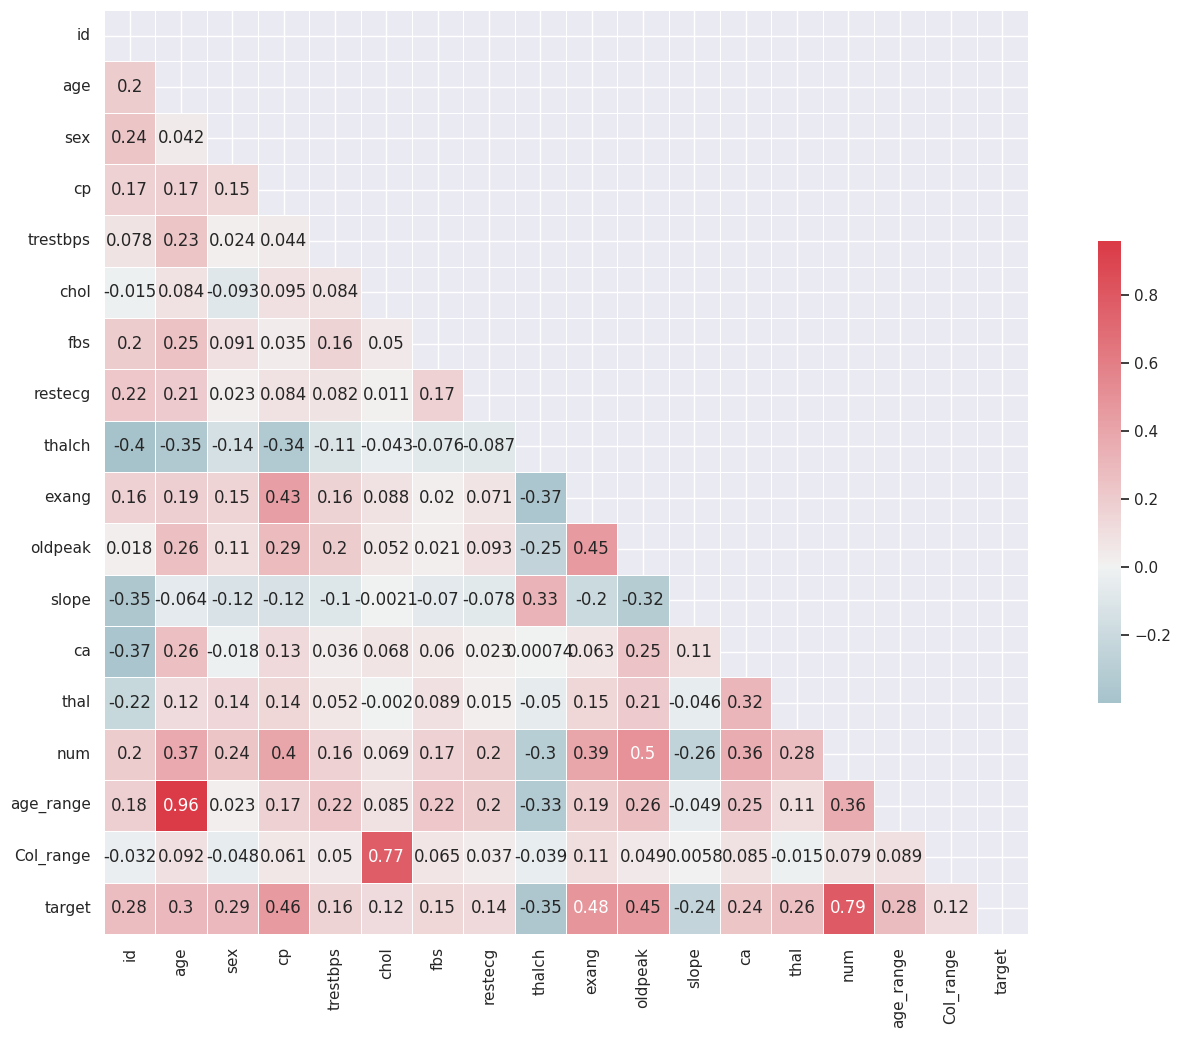

In [ ]:
# Calcular la matriz de correlación
corr = df.corr()

# Crear la máscara
mask = np.zeros_like(corr, dtype=bool)  # Cambiar np.bool a bool
mask[np.triu_indices_from(mask)] = True

# Configurar el gráfico
f, ax = plt.subplots(figsize=(18, 12))
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Graficar el mapa de calor
sns.heatmap(corr, mask=mask, cmap=cmap, center=0, square=True, linewidths=.5, cbar_kws={'shrink': .5}, annot=True)
plt.show()

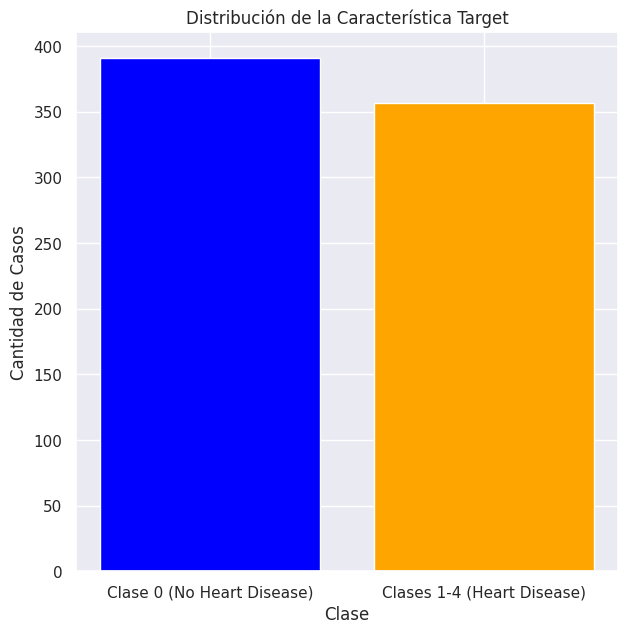

In [ ]:
# Contar las instancias de la columna 'target'
conteo_num = df['num'].value_counts()

# Definir las categorías: clase 0 y la suma de clases 1, 2, 3, 4
valores = [conteo_num[0], conteo_num[1] + conteo_num[2] + conteo_num[3] + conteo_num[4]]
etiquetas = ['Clase 0 (No Heart Disease)', 'Clases 1-4 (Heart Disease)']

# Crear el gráfico de barras
plt.bar(etiquetas, valores, color=['blue', 'orange'])

# Añadir etiquetas y título
plt.xlabel('Clase')
plt.ylabel('Cantidad de Casos')
plt.title('Distribución de la Característica Target')

# Mostrar el gráfico
plt.show()

Quiero agradecer primeramente a Dios por guiarme en este camino y darme la fuerza para seguir adelante. También quiero agradecer a todos los que creyeron en mí y me apoyaron: mi familia, mi esposa, y a mí mismo por el esfuerzo y la dedicación, sin dejar de lado a mis profesores y tutores que han dedicado el tiempo en invertir tiempo en enseñarme a hacer mejor las cosas. Este logro es de todos nosotros

Richard Douglas G.

*Pura Vida* Costa Rica
